In this notebook we do some simple analysis to understand the provided datasets better.

In [2]:
#importing packages

%pip install tabula-py
%pip install tueplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from tueplots import bundles
from tueplots.constants.color import rgb
import math
import re
import textwrap
from tabulate import tabulate
import scipy.stats

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Between 2002 and 2013 the datasets were only available in PDF format, so in a preprocessing step we extracted the data to excel files. Also in these years there are fewer features for each offence category, so we read these files separately.

In [3]:
#reading all cases between 2002 and 2013
cases = []
cases_col_names = ['Key', 'Offence', 'Recorded Cases', 'Recorded Cases Previous Year', 'Change in number', 'Change in %', 'CR% This Year']

for i in range(2,14):
  if(i<10):
    cases_in_this_year = pd.read_excel(f'Cases200{i}.xlsx', skiprows=0)
  else:
    cases_in_this_year = pd.read_excel(f'Cases20{i}.xlsx', skiprows=0)
  for j in range(len(cases_col_names)):
    cases_in_this_year.columns.array[j] = cases_col_names[j]
  to_drop = []
  i = 0
  for ind in cases_in_this_year.index:
    if cases_in_this_year['Key'].isnull()[i] == True:
        to_drop.append(i)
    i += 1
  cases_in_this_year = cases_in_this_year.drop(index=to_drop, axis=0)
  cases_in_this_year = cases_in_this_year.reset_index()
  cases_in_this_year = cases_in_this_year.drop(columns=['index'])

  cases.append(cases_in_this_year)
cases[0]

,Key,Offence,Recorded Cases,Recorded Cases Previous Year,Change in number,Change in %,CR% This Year
0,----,Total offenses,6507394,6363865,143529,2.3,52.6
1,0000,Offenses against life,3541,3577,-36,-1.0,94.5
2,0100,murder (Sect. 211 PC),873,860,13,1.5,96.7
3,0110,robbery attended with murder,64,99,-35,x,95.3
4,0120,sexual murder,27,24,3,x,114.8
...,...,...,...,...,...,...,...
396,8935,economic crime in connection with,14668,13538,1130,8.3,100.3
397,8936,fraud and breach of trust in connection with,16422,36393,-19971,-54.9,99.7
398,8960,offenses against provisions designed to,993,1016,-23,-2.3,91.3
399,8970,computer crime,57488,79283,-21795,-27.5,50.0


In [4]:
#reading all cases, suspects, victims, and developement files between 2014 and 2022
suspects = []
victims = []
developments = []

cases_col_names = ['Key', 'Offence', 'Recorded Cases', 'Percentage of All Cases', 'Attempts', 'Attempts in %', 'Inhabitants < 20k', '20k < Inhabitants < 100k', '100k < Inhabitants < 500k',
             'Inhabitants > 500k', 'Number of Inhabitants Unknown', 'Threatened with Firearm', 'Shot', 'Clearance', 'Clearance in %', 'Number of Suspects Recorded', 'Male Suspects',
             'Female Suspects', 'Number of Non-German Suspects', 'Non-German Suspects in %']
suspects_col_names = ['Key', 'Offence', 'Sex', 'Number of Suspects', 'Age < 6', '6 < Age < 8', '8 < Age < 10', '10 < Age < 12', '12 < Age < 14',
             'Age < 14', '14 < Age < 16', '16 < Age < 18', '14 < Age < 18', '18 < Age < 21', 'Age < 21', '21 < Age < 23', '23 < Age < 25',
             '21 < Age < 25', '25 < Age < 30', '30 < Age < 40', '40 < Age < 50', '50 < Age < 60', '60 < Age', '21 < Age']
victims_col_names = ['Key', 'Offence', 'Case status', 'Total', 'Male', 'Female', 'Total Age < 6', 'Male Age < 6', 'Female Age < 6',
                     'Total 6 < Age < 14', 'Male 6 < Age < 14', 'Female 6 < Age < 14', 'Total Age < 14', 'Male Age < 14', 'Female Age < 14',
                     'Total 14 < Age < 18', 'Male 14 < Age < 18', 'Female 14 < Age < 18', 'Total 18 < Age < 21', 'Male 18 < Age < 21', 'Female 18 < Age < 21',
                     'Total 21 < Age < 60', 'Male 21 < Age < 60', 'Female 21 < Age < 60', 'Total 60 < Age', 'Male 60 < Age', 'Female 60 < Age',
                     'Total 21 < Age', 'Male 21 < Age', 'Female 21 < Age']
developments_col_names = ['Change', 'Key', 'Offence', 'Recorded cases this year', 'Recorded cases previous year', 'Change number', 'Change in %', 'CR% this year', 'CR% previous year']

for i in range(14,23):
  cases_in_this_year = pd.read_excel(f'pks20{i}CasesBasicTable_excel.xlsx', skiprows=7)
  suspects_in_this_year = pd.read_excel(f'pks20{i}Suspects_excel.xlsx', skiprows=8)
  victims_in_this_year = pd.read_excel(f'pks20{i}Victims_excel.xlsx', skiprows=6)
  developments_in_this_year = pd.read_excel(f'pks20{i}CasesDevelopment_excel.xlsx', skiprows=17)


  for j in range(len(cases_col_names)):
    cases_in_this_year.columns.array[j] = cases_col_names[j]
  for j in range(len(suspects_col_names)):
    suspects_in_this_year.columns.array[j] = suspects_col_names[j]
  for j in range(len(victims_col_names)):
    victims_in_this_year.columns.array[j] = victims_col_names[j]
  for j in range(len(developments_col_names)):
    developments_in_this_year.columns.array[j] = developments_col_names[j]

  cases.append(cases_in_this_year)
  suspects.append(suspects_in_this_year)
  victims.append(victims_in_this_year)
  #developments.append(developments_in_this_year)

Creating a plot to see the number of cases, suspects and victims each year, as well as the clearance rates.

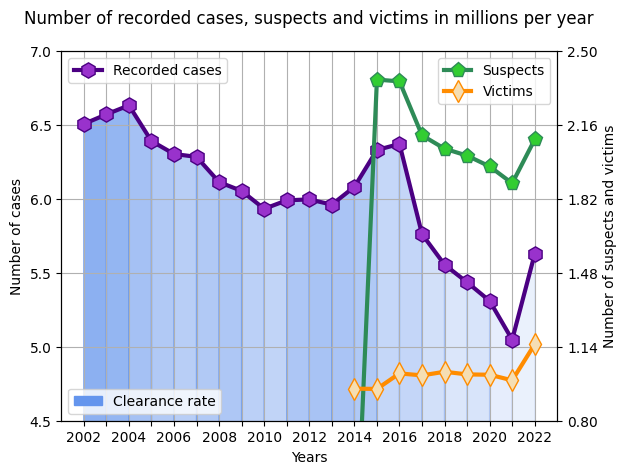

In [4]:
recorded_cases_per_year = [cases[i].loc[0].at['Recorded Cases']/10**6 for i in range(21)]
recorded_suspects_per_year = [suspects[i].loc[2].at['Number of Suspects']/10**6 for i in range(9)]
recorded_victims_per_year = [victims[i].loc[2].at['Total']/10**6 for i in range(9)]
cleared_cases_per_year_percentage = [float(cases[i].loc[0].at['CR% This Year']) for i in range(12)]+[cases[i].loc[0].at['Clearance in %']for i in range(12,21)]

x_axis = [*range(2014,2023)]
fig, ax1 = plt.subplots()
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of cases')
x = np.arange(2002,2023)

# Alpha values for each vertical line
alpha_values = np.arange(2002,2023)
# Create a gradient between the alpha values
gradient_alpha = [1-(cleared_cases_per_year_percentage[i]-50)/10 for i in range(21)] # Bigger alpha values correspond to smaller clearance rates (alpha=1: 50%; alpha=0: 60%)
# Plot the recorded cases using the left y-axis
ax1.plot([*range(2002,2023)], recorded_cases_per_year, 'h-', color='indigo', linewidth=3, markersize=11, markerfacecolor='darkorchid', label='Recorded cases')
# Shade the area under the curve with varying alpha values
for i in range(len(alpha_values) - 1):
    plt.fill_between(x, recorded_cases_per_year, alpha=gradient_alpha[i], color='cornflowerblue', where=(x >= alpha_values[i]) & (x <= alpha_values[i + 1]))
# Create a legend for the shading
legend_shading = plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='cornflowerblue', alpha=1)], labels=['Clearance rate'], loc='lower left')
plt.gca().add_artist(legend_shading)

ax1.set_ylim([4.5, 7])
plt.grid()
plt.legend(loc=2)
plt.yticks(np.arange(4.5,7.1,0.5))

# Plot the number of suspects and victims using the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Number of suspects and victims')
ax2.plot([*range(2014,2023)], recorded_suspects_per_year, 'p-', color='seagreen', linewidth=3, markersize=11, markerfacecolor='limegreen', label='Suspects')
ax2.plot([*range(2014,2023)], recorded_victims_per_year, 'd-', color='darkorange', linewidth=3, markersize=11, markerfacecolor='wheat', label='Victims')
ax2.set_ylim([0.8, 2.5])
plt.yticks(np.arange(0.8,2.51,0.34))

plt.xticks(np.arange(2002,2023), [2002, '', 2004, '', 2006, '', 2008, '', 2010, '', 2012, '', 2014, '', 2016, '', 2018, '', 2020, '', 2022])
plt.title('Number of recorded cases, suspects and victims in millions per year', pad=20)
plt.legend(loc='upper right')

#plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))

#plt.savefig('introduction.pdf', dpi=100)
plt.show()

Distribution between genders

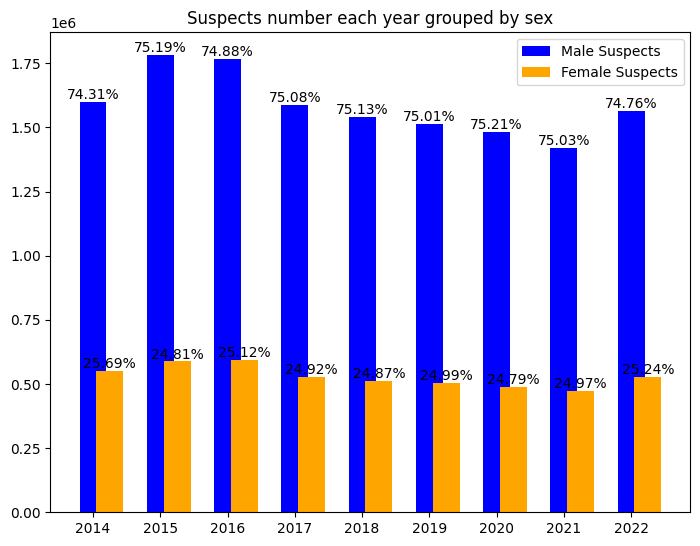

In [5]:
# Plotting the number of male and female suspects each year

male_suspects_per_year = [cases[i].loc[0].at['Male Suspects'] for i in range(12,21)]
female_suspects_per_year = [cases[i].loc[0].at['Female Suspects'] for i in range(12,21)]

male_suspects_percentage_per_year = [f"{round(cases[i].loc[0].at['Male Suspects']/cases[i].loc[0].at['Number of Suspects Recorded']*100, 2)}%" for i in range(12,21)]
female_suspects_percentage_per_year = [f"{round(cases[i].loc[0].at['Female Suspects']/cases[i].loc[0].at['Number of Suspects Recorded']*100, 2)}%" for i in range(12,21)]

new_years = [*range(2014,2023)]

X = np.arange(len(new_years))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(np.arange(len(new_years)), new_years)
plt.title('Suspects number each year grouped by sex')
ax.bar(X + 0.00, male_suspects_per_year, color = 'blue', width = 0.4, label='Male Suspects')
ax.bar_label(ax.containers[0], labels = male_suspects_percentage_per_year, label_type='edge')
ax.bar(X + 0.25, female_suspects_per_year, color = 'orange', width = 0.4, label='Female Suspects')
ax.bar_label(ax.containers[1], labels = female_suspects_percentage_per_year, label_type='edge')
ax.legend()

Text(0.5, 1.0, 'Number of male and female suspects under the age of 14 each year')

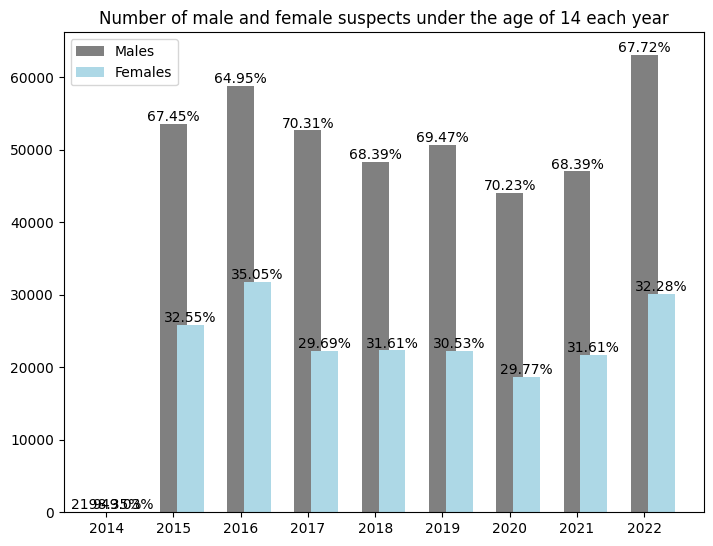

In [6]:
male_suspects_under14_per_year = [suspects[i].loc[0].at['Age < 14'] for i in range(9)]
female_suspects_under14_per_year = [suspects[i].loc[1].at['Age < 14'] for i in range(9)]

suspects_under14_per_year = [suspects[i].loc[2].at['Age < 14'] for i in range(9)]
suspects_per_year = [suspects[i].loc[2].at['Number of Suspects'] for i in range(9)]

male_suspects_under14_percentage_per_year = [f"{round(suspects[i].loc[0].at['Age < 14']/suspects[i].loc[2].at['Age < 14']*100, 2)}%" for i in range(9)]
female_suspects_under14_percentage_per_year = [f"{round(suspects[i].loc[1].at['Age < 14']/suspects[i].loc[2].at['Age < 14']*100, 2)}%" for i in range(9)]

# Plotting the number of male and female suspects under the age of 14 each year
X = np.arange(len(new_years))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(np.arange(len(new_years)), new_years)
ax.bar(X + 0.00, male_suspects_under14_per_year, color = 'gray', width = 0.4, label='Males')
ax.bar_label(ax.containers[0], labels = male_suspects_under14_percentage_per_year, label_type='edge')
ax.bar(X + 0.25, female_suspects_under14_per_year, color = 'lightblue', width = 0.4, label='Females')
ax.bar_label(ax.containers[1], labels = female_suspects_under14_percentage_per_year, label_type='edge')
ax.legend()
plt.title('Number of male and female suspects under the age of 14 each year')

Text(0.5, 1.0, 'Ratio of suspects under 14')

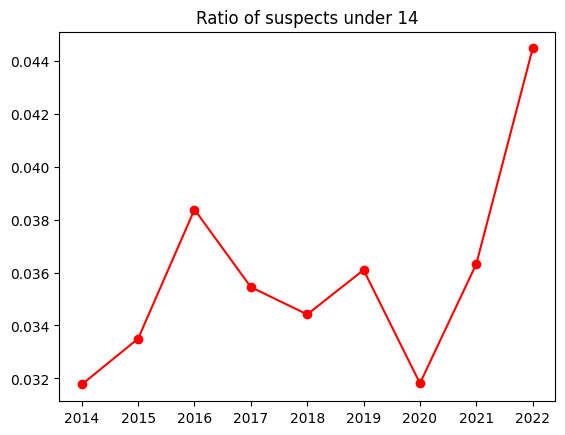

In [7]:
#Plotting the ratio of suspects under the age of 14
ratio_of_under14_to_all = res = [i / j for i, j in zip(suspects_under14_per_year, suspects_per_year)]
plt.plot(new_years,ratio_of_under14_to_all, 'o-', color='red')
plt.title('Ratio of suspects under 14')

Analysing suspect distribution based on nationality (German vs. non-German).

In [13]:
# Data from DeStatIs: https://www.destatis.de/EN/Themes/Society-Environment/Population/Current-Population/Tables/lrbev02a.html
from tabula import read_pdf
population = read_pdf('ger_pop_by_nat_and_sex.pdf', pages='all', stream=True)
pop_1991_2022 = population[0]
pop_1991_2022 = pop_1991_2022.drop([0,33,34,35,36])

# Correcting some mistakes, splitting a column into two, renaming columns
pop_1991_2022 = pop_1991_2022.replace(['2017 2 82,792,351'], '2017 82,792,351')
pop_1991_2022 = pop_1991_2022.replace(['2016 2 82,521,653'], '2016 82,521,653')
pop_1991_2022 = pop_1991_2022.replace(['2011 3 80,327,900'], '2011 80,327,900')
pop_1991_2022 = pop_1991_2022.replace(['42,128 512'], '42,128,512')
for ind in pop_1991_2022.index:
  pop_1991_2022['Reference Total'][ind] = pop_1991_2022['Reference Total'][ind][5:]
pop_1991_2022.insert(0, 'Reference year', [*range(1991,2023)], True)
col_names = ['Reference year', 'Total', 'Male total', 'Female total', 'German total', 'German male', 'German female', 'Non-German total',
             'Non-German male', 'Non-German female']
for i in range(len(col_names)):
  pop_1991_2022.columns.array[i] = col_names[i]
pop_1991_2022
for i in range(1,len(col_names)):
  for ind in pop_1991_2022.index:
    pop_1991_2022[col_names[i]][ind] = int(pop_1991_2022[col_names[i]][ind].replace(',', ''))

<ipython-input-13-1a7cbc75ebef>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_1991_2022[col_names[i]][ind] = int(pop_1991_2022[col_names[i]][ind].replace(',', ''))


Text(0.5, 1.0, 'Ratio of non-Germans in the population')

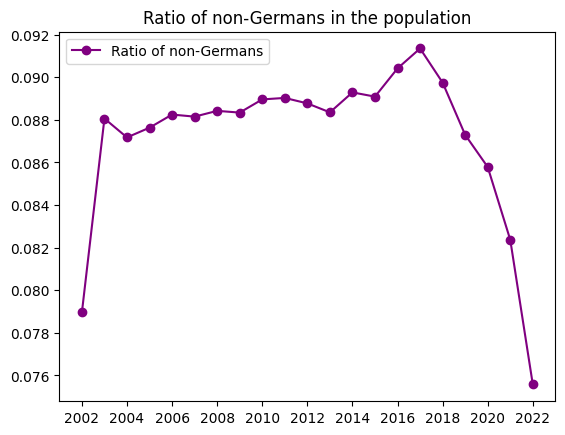

In [14]:
#Plotting the ratio of non-germans in the population each year
plt.plot([*range(2002,2023)],[(pop_1991_2022['Non-German total'][i]/pop_1991_2022['Total'][i]) for i in range(12,33)], 'o-', color='purple', label='Ratio of non-Germans')
plt.legend()
plt.xticks(np.arange(2002,2023,2))
plt.title('Ratio of non-Germans in the population')

What are the correlations between the features of a crime?

<ipython-input-15-96d858a2e7c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cases[20].corr()


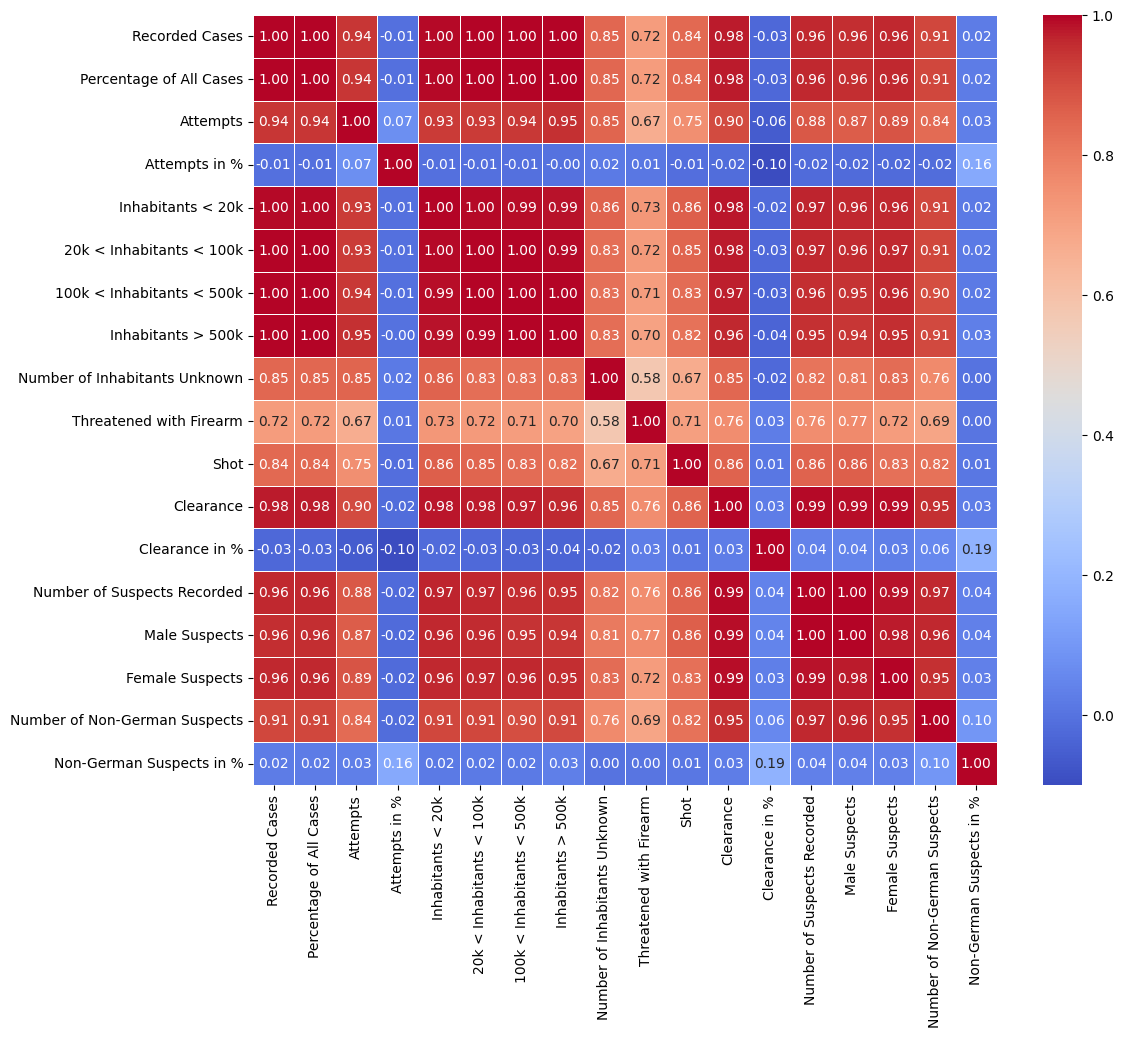

In [15]:
import seaborn as sns
correlation_matrix = cases[20].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

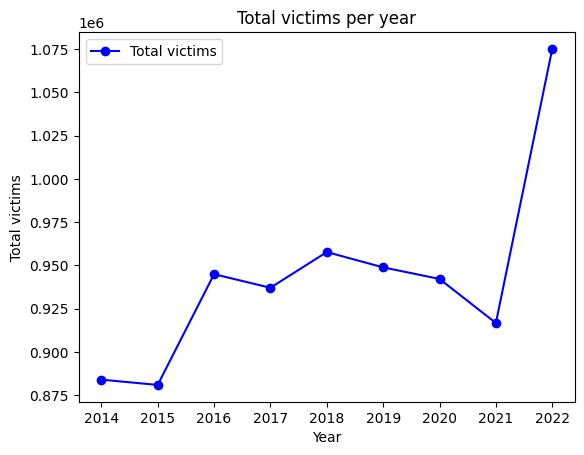

In [16]:
recorded_victims_per_year_2014_2022 = [victims[i].loc[0].at['Total'] for i in range(9)]
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Plotting the total number of victims per year
plt.plot(years, recorded_victims_per_year_2014_2022, marker='o', linestyle='-', color='b', label='Total victims')
plt.xlabel('Year')
plt.ylabel('Total victims')
plt.title('Total victims per year')
plt.xticks(years)
plt.legend()

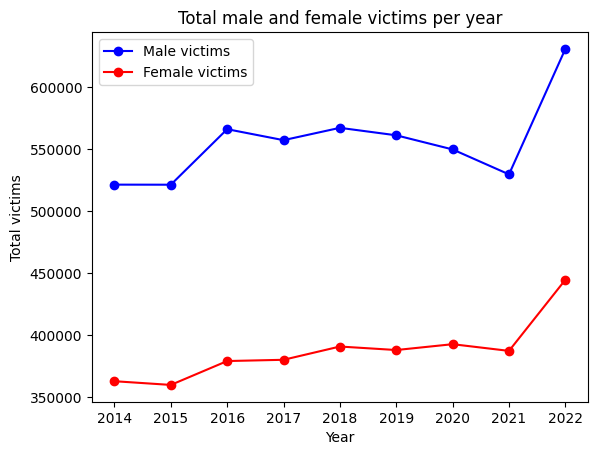

In [17]:
total_male_victims = [victims[i].loc[0].at['Male'] for i in range(9)]
total_female_victims = [victims[i].loc[0].at['Female'] for i in range(9)]
#Plotting the total number of victims per year between genders
plt.plot(years, total_male_victims, marker='o', linestyle='-', color='blue', label='Male victims')
plt.plot(years, total_female_victims, marker='o', linestyle='-', color='red', label='Female victims')

plt.xlabel('Year')
plt.ylabel('Total victims')
plt.title('Total male and female victims per year')
plt.xticks(years)

plt.legend()

<ipython-input-18-82318dae1e21>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_female_offences['Offence'] = top_female_offences['Offence'].apply(remove_parentheses)


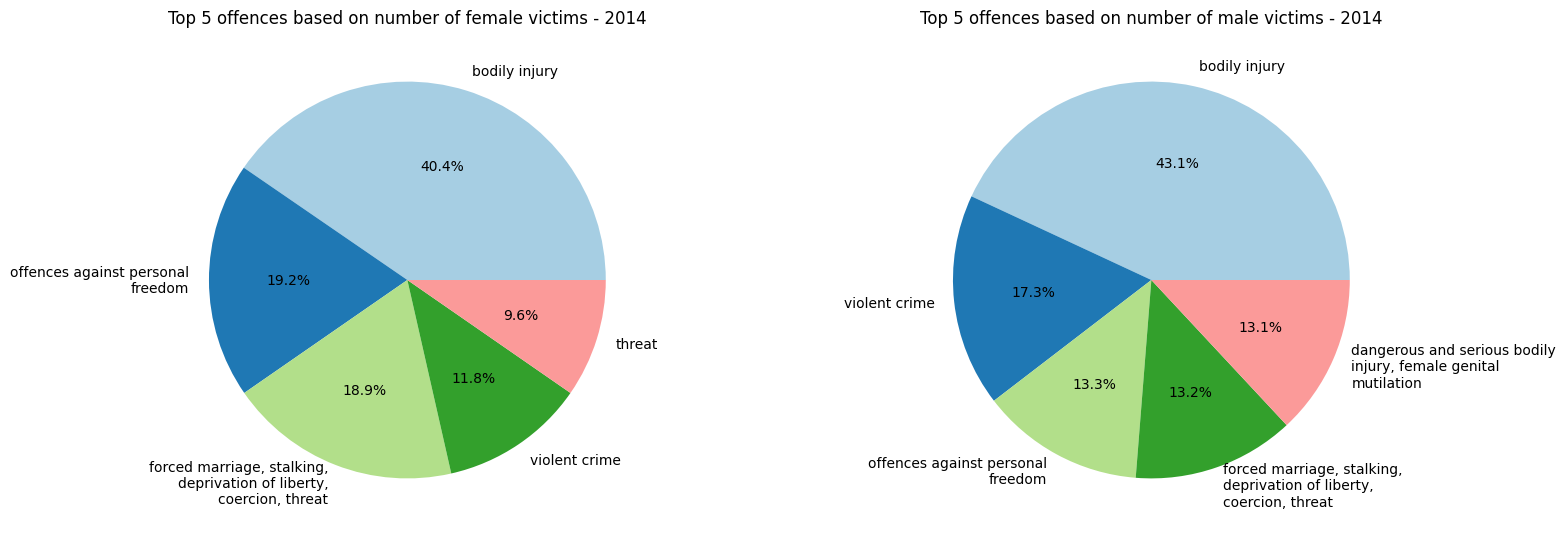

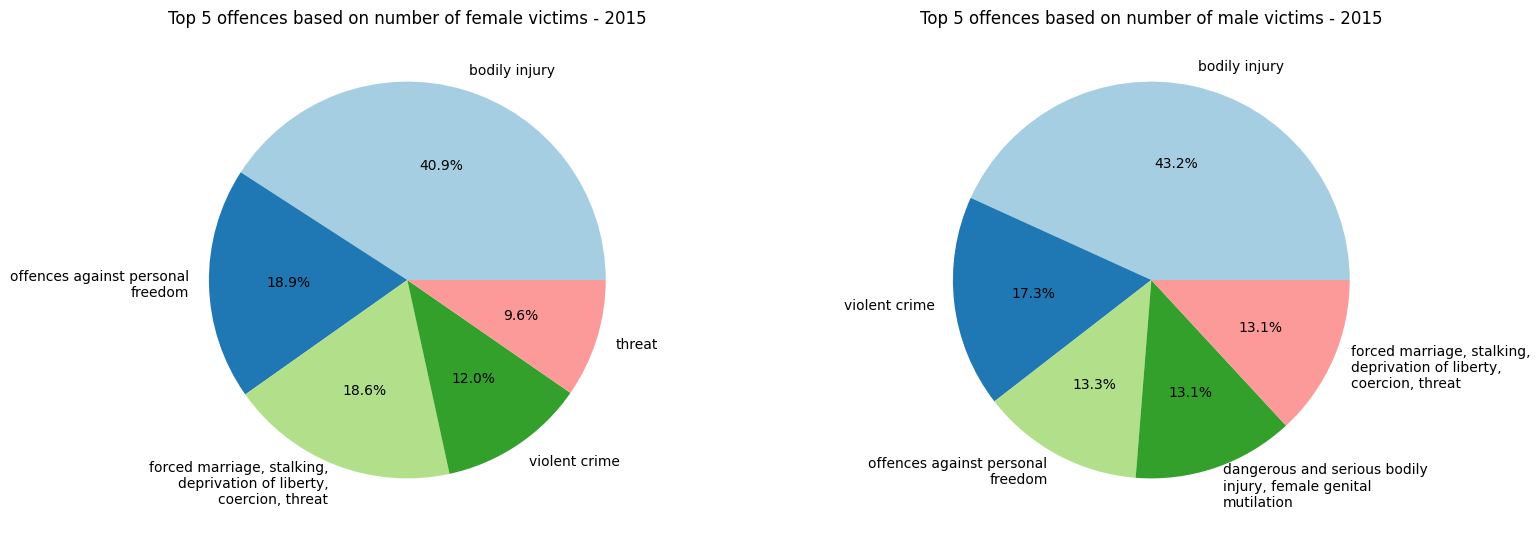

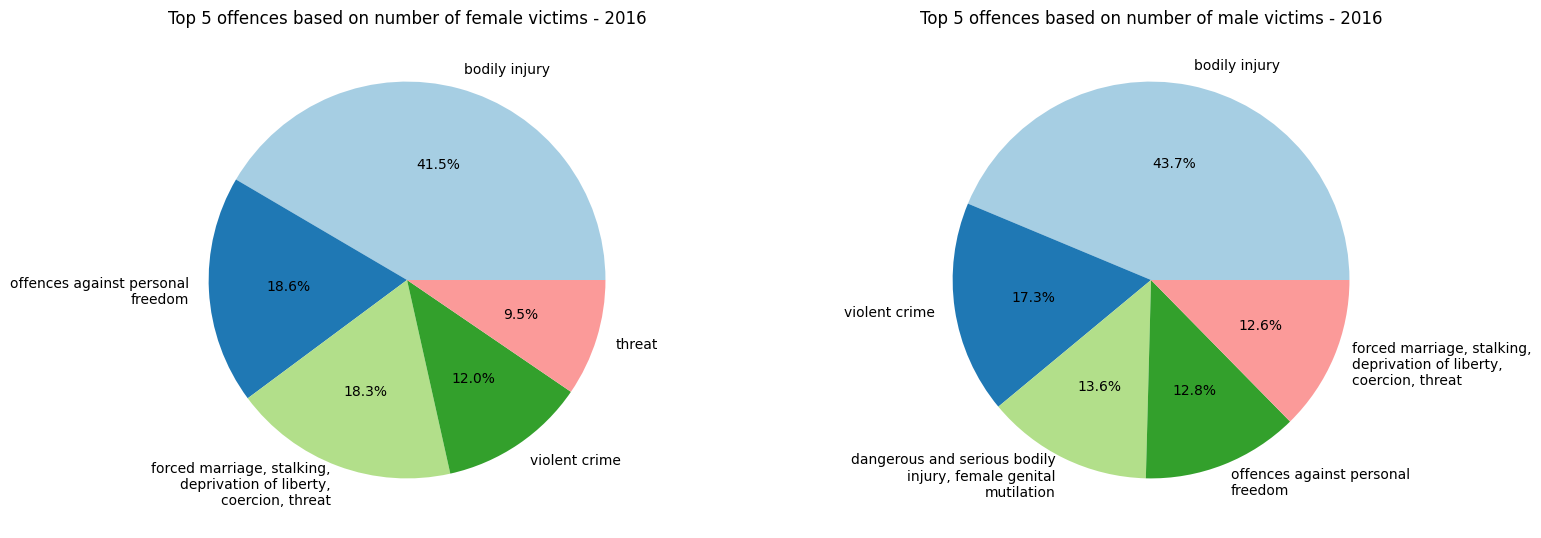

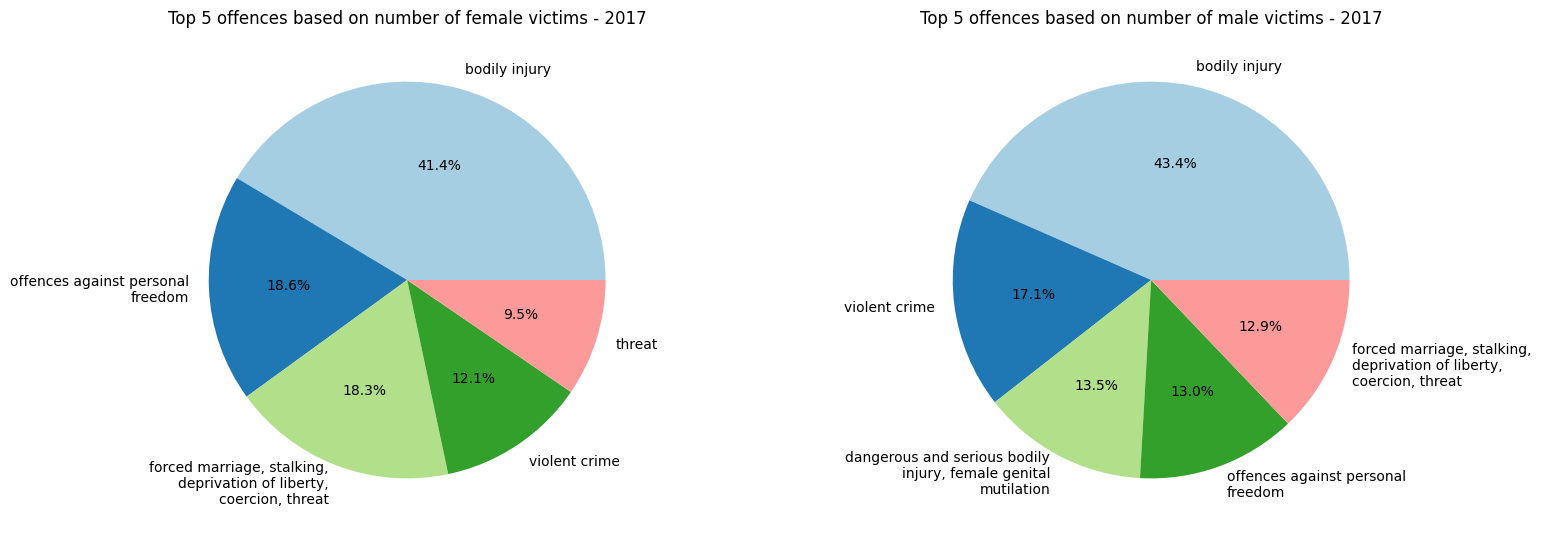

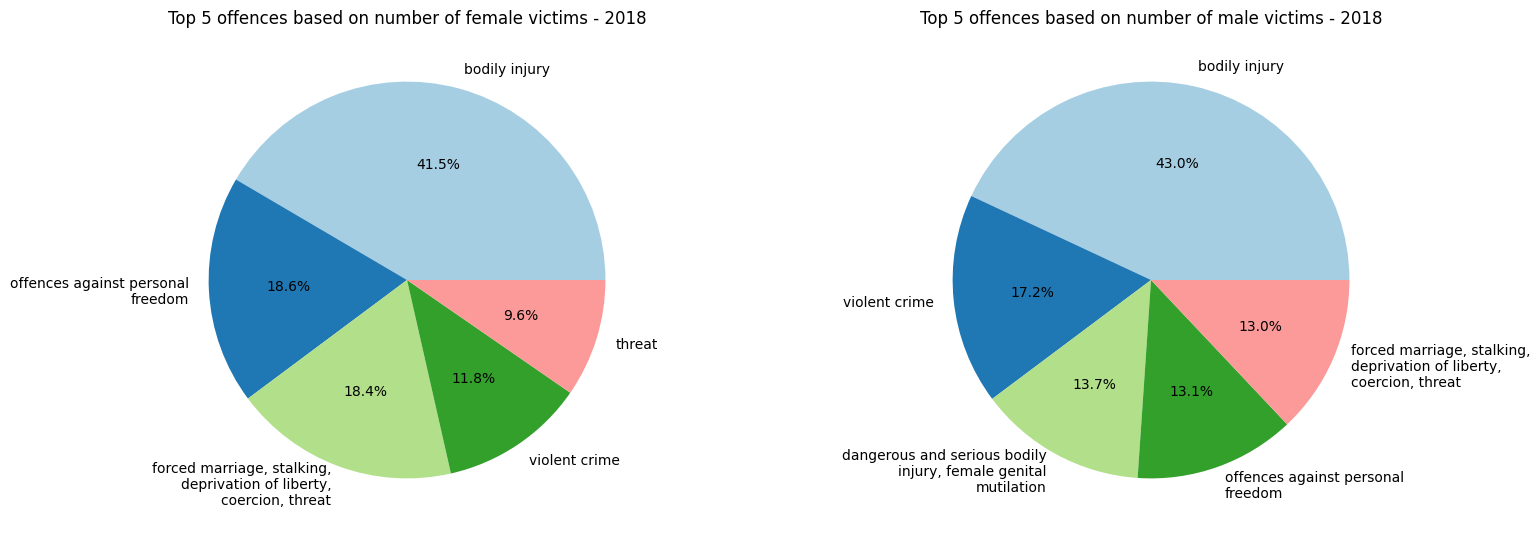

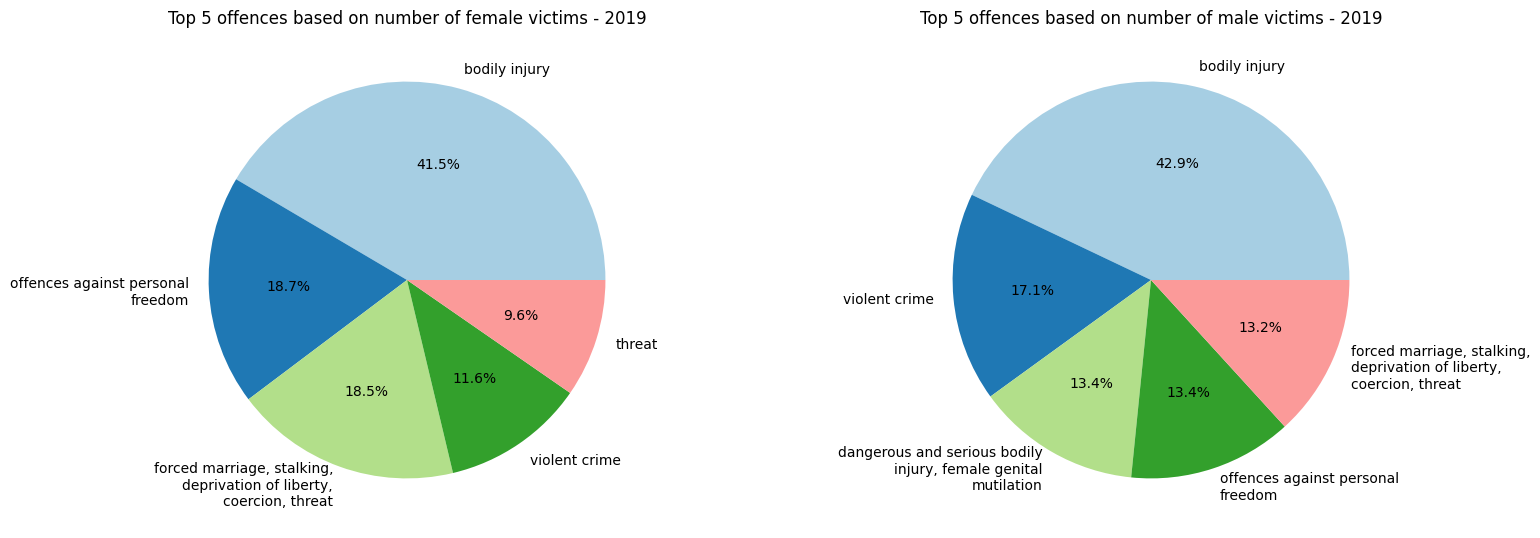

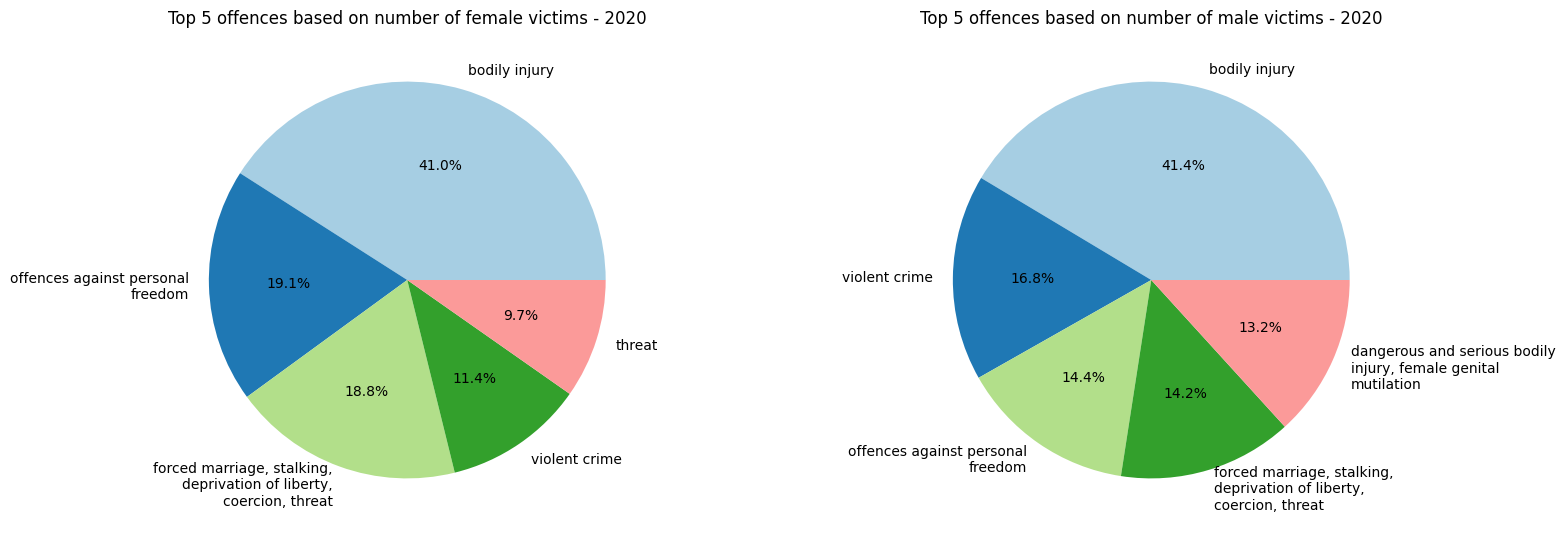

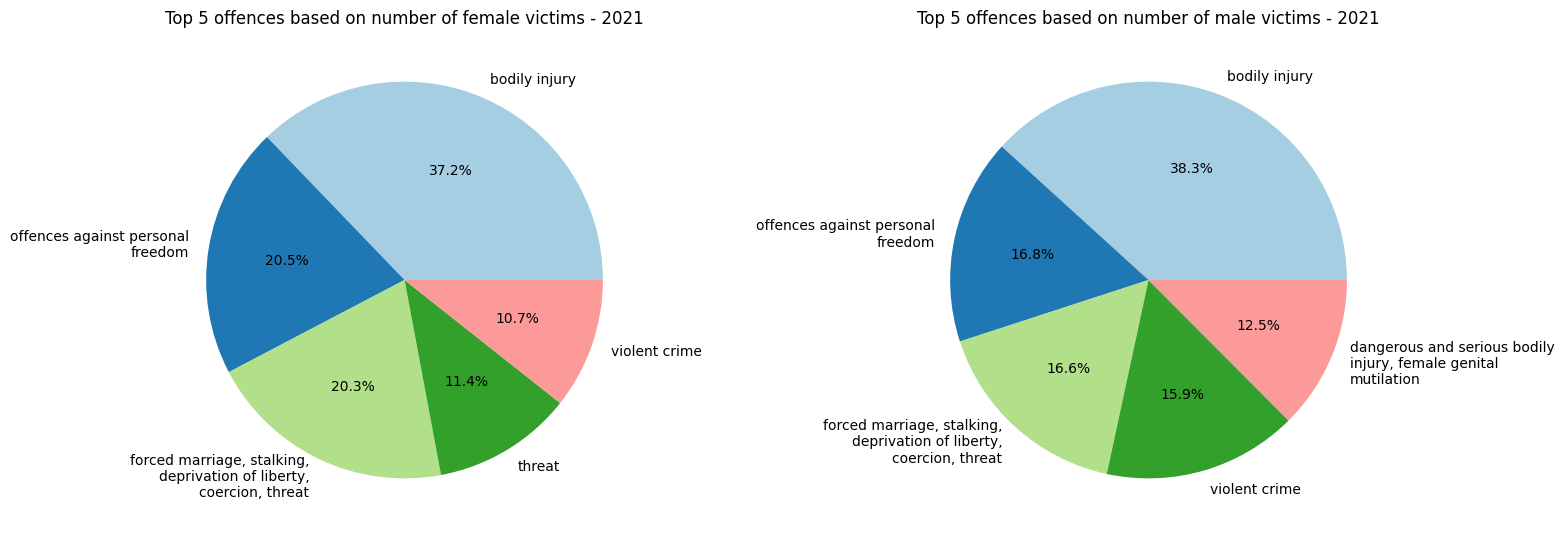

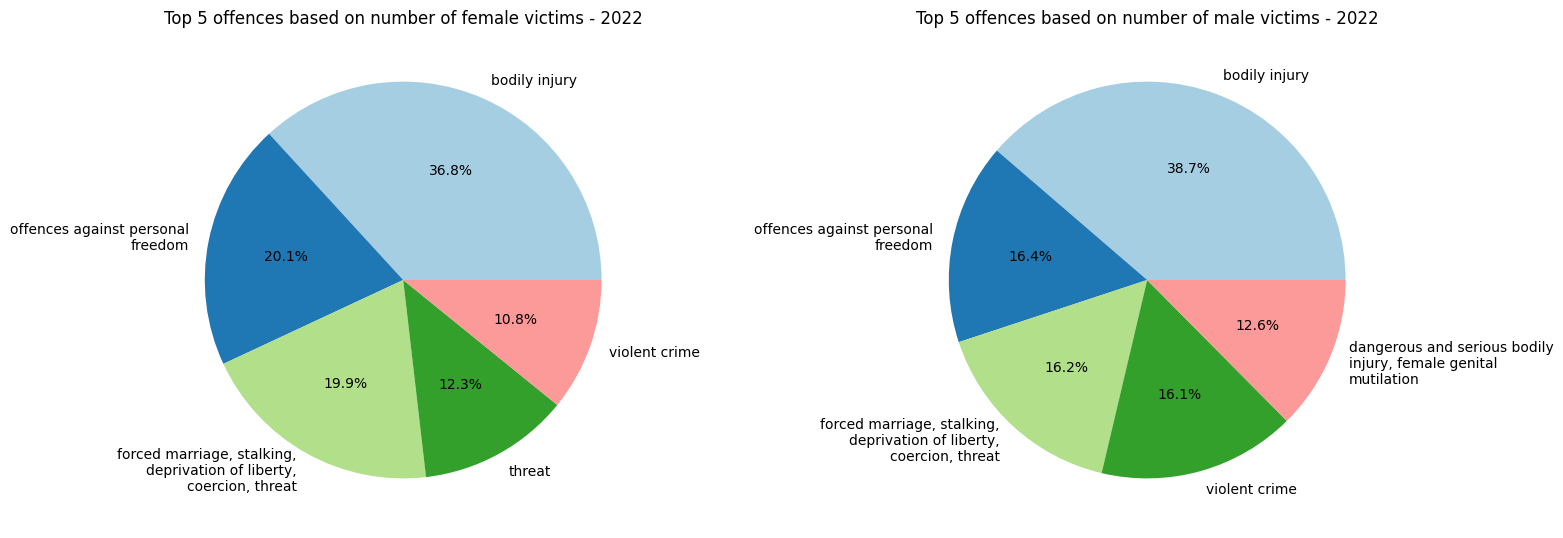

In [18]:
#Plotting top 5 offences based on number of male and female victims per year
def remove_parentheses(text):
    return re.sub(r'\([^)]*\)', '', text)

for year, dataframe in zip(years, victims):
    filtered_dataframe = dataframe[(~dataframe['Offence'].isin(['(intentional simple) bodily injury (sect. 223 PC)', 'total offences'])) & (dataframe['Case status'] == 'total')]

    top_female_offences = filtered_dataframe.nlargest(5, 'Female')[['Offence', 'Female']]
    top_male_offences = filtered_dataframe.nlargest(5, 'Male')[['Offence', 'Male']]

    top_female_offences['Offence'] = top_female_offences['Offence'].apply(remove_parentheses)
    top_male_offences['Offence'] = top_male_offences['Offence'].apply(remove_parentheses)

    plt.figure(figsize=(16, 7))

    plt.subplot(1, 2, 1)
    labels_female_wrapped = [textwrap.fill(label, width=30) for label in top_female_offences['Offence']]  # Adjust the width as needed
    plt.pie(top_female_offences['Female'], labels=labels_female_wrapped, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top_female_offences))))
    plt.title(f"Top 5 offences based on number of female victims - {year}")

    plt.subplot(1, 2, 2)
    labels_male_wrapped = [textwrap.fill(label, width=30) for label in top_male_offences['Offence']]  # Adjust the width as needed
    plt.pie(top_male_offences['Male'], labels=labels_male_wrapped, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top_male_offences))))
    plt.title(f"Top 5 offences based on number of male victims - {year}")

    plt.subplots_adjust(wspace=0.5)

Top 5 offenses based on the number of victims each year, distinguished by gender. As observed over the past 7 years, the highest number of both women and men have been victims of offences related to bodily injuries. In conclusion, each year both men and women are victims of violent crimes, threat, verbal abuse and invasion of privacy. The pattern remains similar through years.

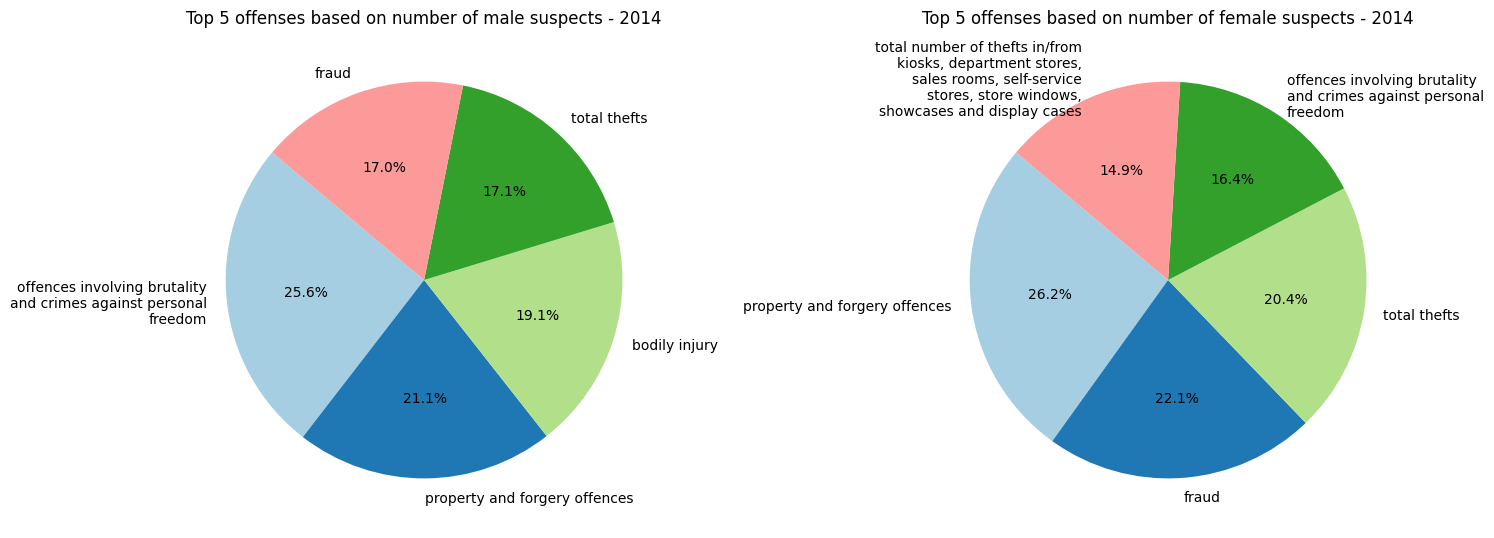

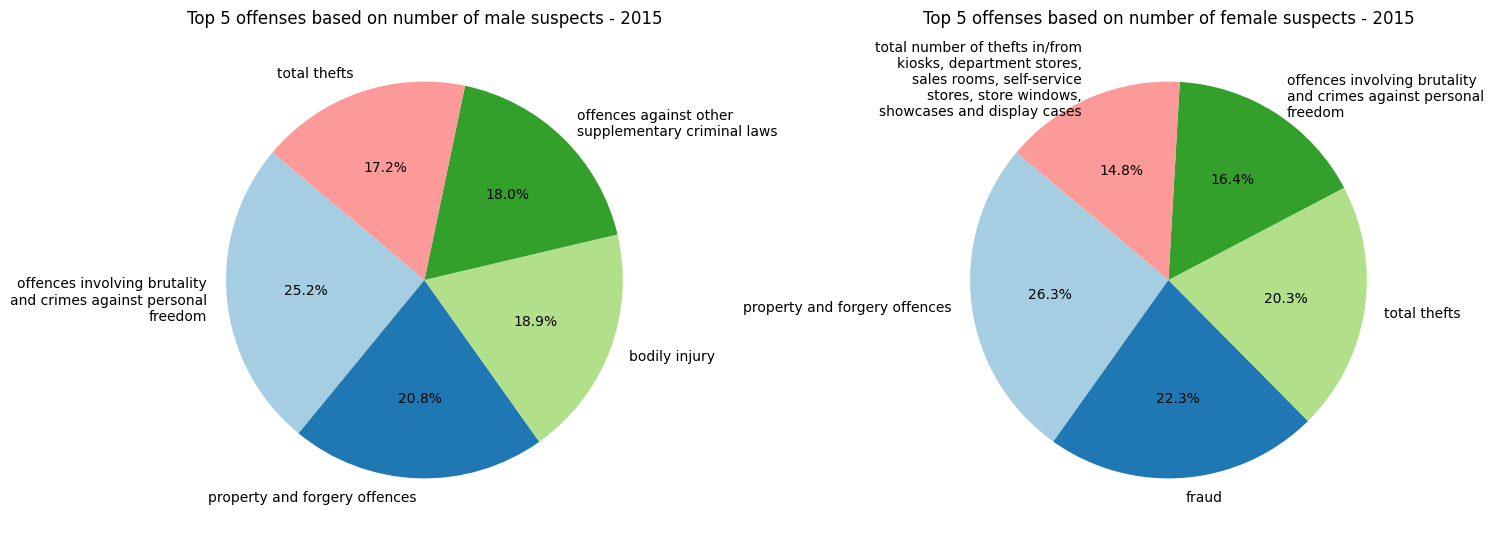

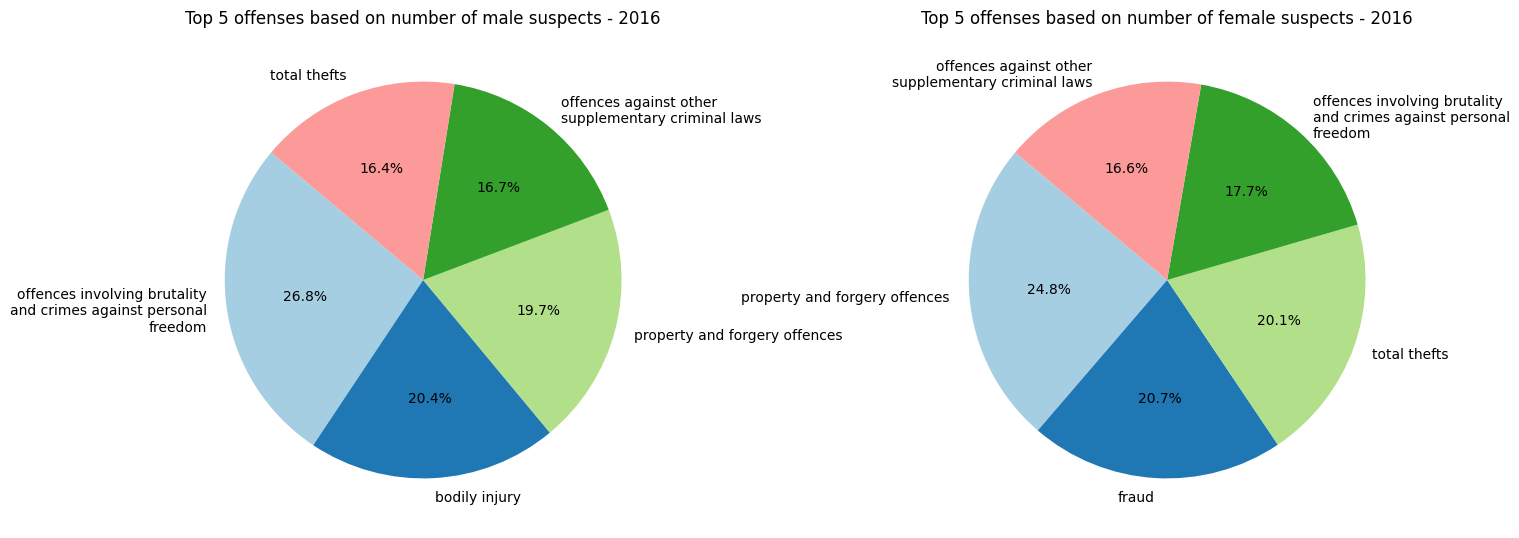

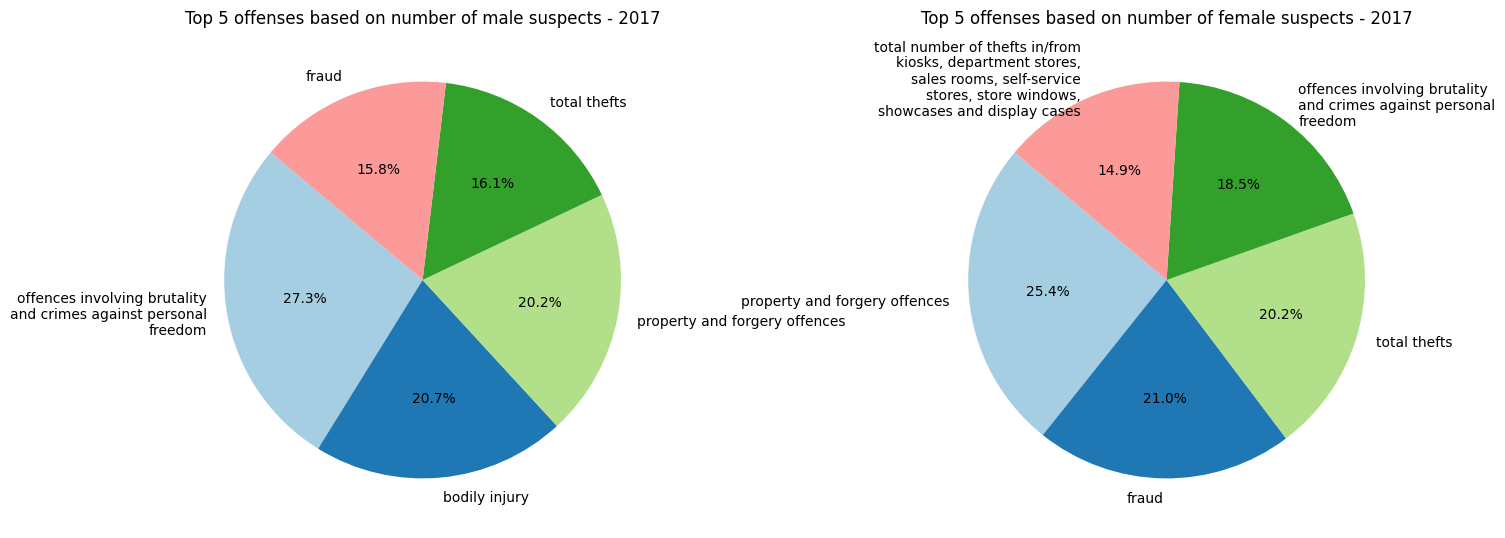

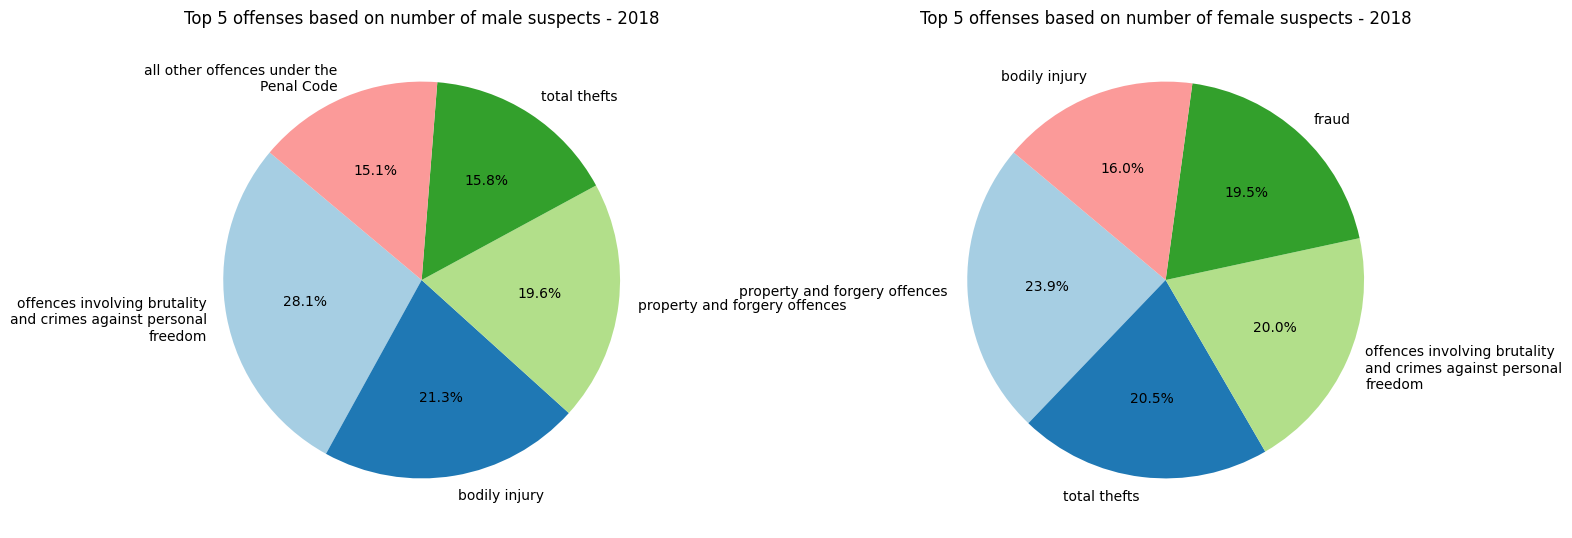

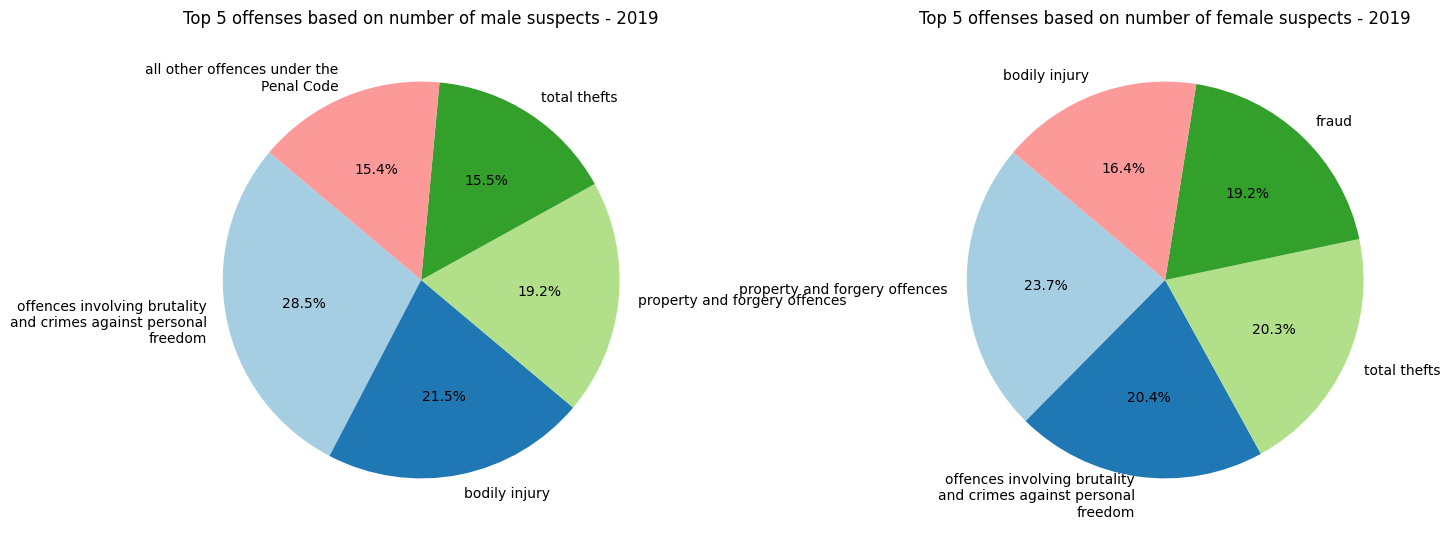

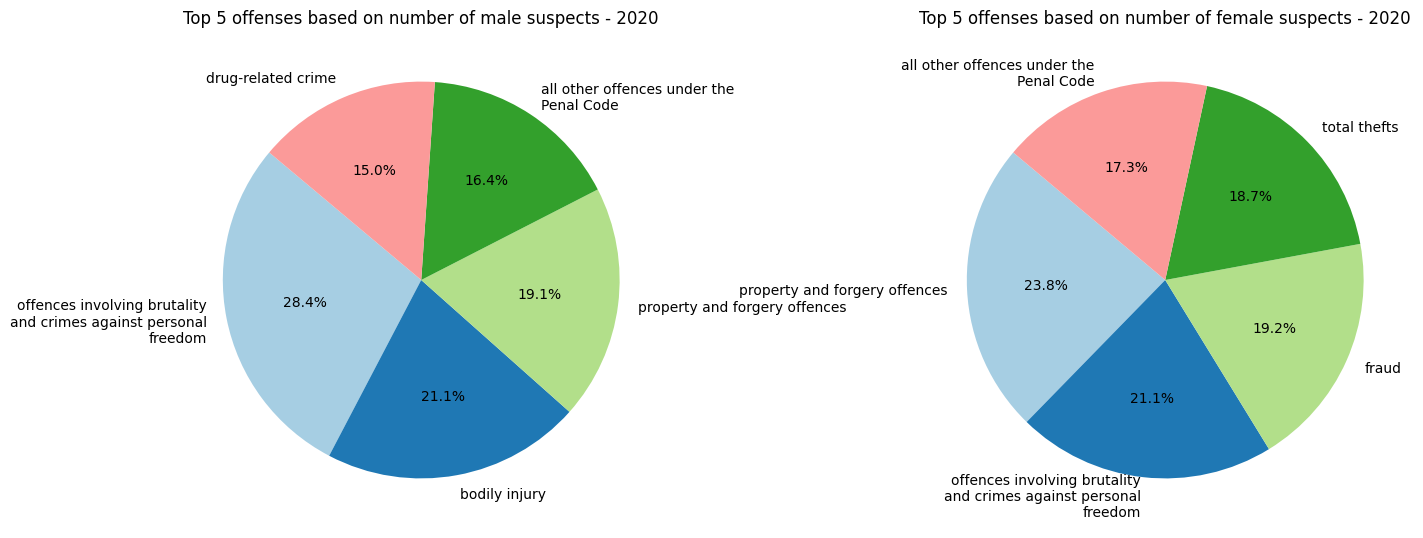

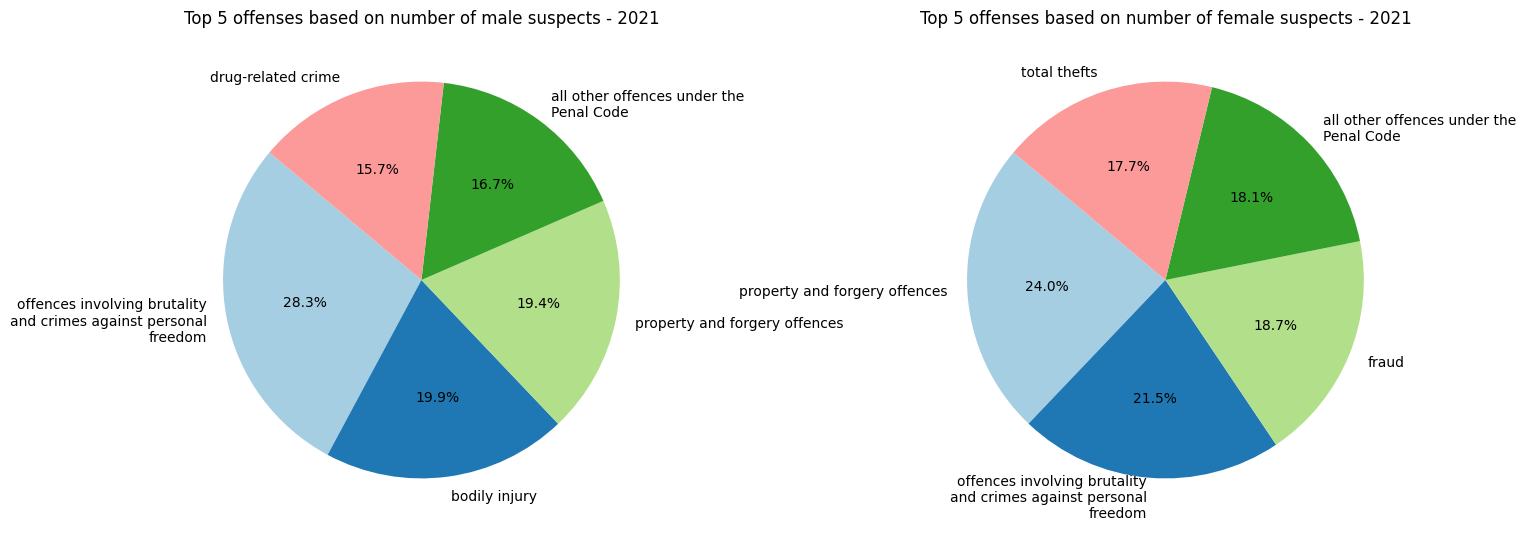

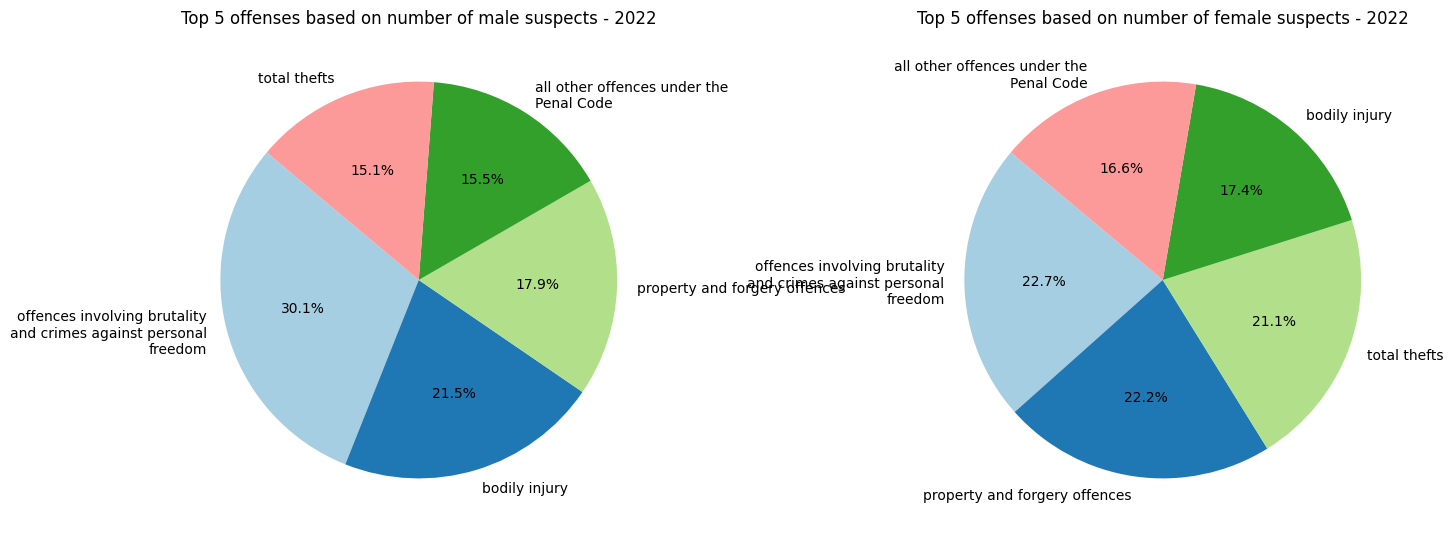

In [19]:
#Plotting top 5 offences based on number of male and female suspects per year
def remove_parentheses(text):
    return re.sub(r'\([^)]*\)', '', text)

years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

top_male_offences = {}
top_female_offences = {}

for year, df in zip(years, suspects):
    df = df[(df['Key'] != '------') & (df['Key'] != '890000')]

    male_df = df[df['Sex'].str.lower() == 'm']
    mask_male = (
        pd.notna(male_df['Offence']) &
        ~male_df['Offence'].astype(str).str.contains('Supplementary criminal laws|other criminal offences \(PC\)', regex=True) &
        ~male_df['Offence'].astype(str).str.contains('theft without aggravating circumstances \(sects\. 242, 247, 248 a-c PC\), namely:', regex=True)
    )
    top_male = male_df[mask_male].nlargest(5, 'Number of Suspects')[['Offence', 'Number of Suspects']]
    top_male['Year'] = year
    top_male_offences[year] = top_male

    female_df = df[df['Sex'].str.lower().isin(['f', 'w'])]
    mask_female = (
        pd.notna(female_df['Offence']) &
        ~female_df['Offence'].astype(str).str.contains('Supplementary criminal laws|other criminal offences \(PC\)', regex=True) &
        ~female_df['Offence'].astype(str).str.contains('theft without aggravating circumstances \(sects\. 242, 247, 248 a-c PC\), namely:|Theft without aggravating circumstances \(sects\. 242, 247, 248 a-c PC\), namely:', regex=True)
    )
    top_female = female_df[mask_female].nlargest(5, 'Number of Suspects')[['Offence', 'Number of Suspects']]
    top_female['Year'] = year
    top_female_offences[year] = top_female

for year in years:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    labels_male = [remove_parentheses(offence.replace('total number of thefts, namely:', 'total thefts')) for offence in top_male_offences[year]['Offence']]
    labels_male_wrapped = [textwrap.fill(label, width=30) for label in labels_male]  # Adjust the width as needed
    axes[0].pie(top_male_offences[year]['Number of Suspects'], labels=labels_male_wrapped, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(labels_male))))
    axes[0].set_title(f"Top 5 offenses based on number of male suspects - {year}")

    labels_female = [remove_parentheses(offence.replace('total number of thefts, namely:', 'total thefts')) for offence in top_female_offences[year]['Offence']]
    labels_female_wrapped = [textwrap.fill(label, width=30) for label in labels_female]  # Adjust the width as needed
    axes[1].pie(top_female_offences[year]['Number of Suspects'], labels=labels_female_wrapped, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(labels_female))))
    axes[1].set_title(f"Top 5 offenses based on number of female suspects - {year}")

    plt.subplots_adjust(wspace=0.5)


Comparing the top 5 offenses based on the number of male and female victims to the top 5 offenses based on the number of male and female suspects reveals differences in patterns. Common offenses in both victims and suspects include bodily injury and offenses against personal freedom, dominating the top 5 offenses for victims. In the top 5 offenses for suspects, a noticeable shift occurs. In addition to bodily injury and offenses against personal freedom, property and forgery offenses become prominent, along with various types of thefts and frauds.

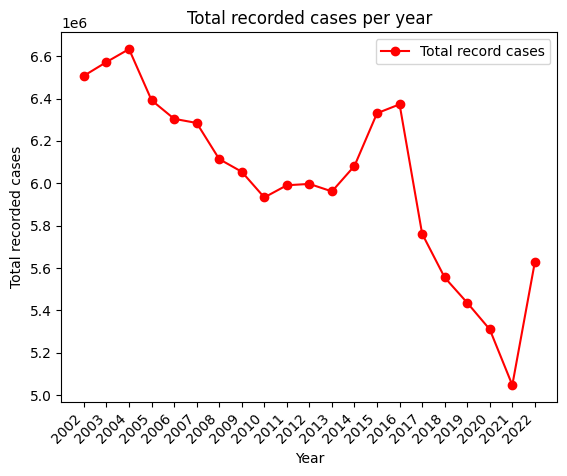

In [20]:
#Plotting total number of recorded cases per year and connection to social events
cases_2002_2013 = cases[:12]
cases_2014_2022 = cases[-9:]
recorded_cases_per_year_2002_2013 = [cases_2002_2013[i].loc[0].at['Recorded Cases'] for i in range(12)]
recorded_cases_per_year_2014_2022 = [cases_2014_2022[i].loc[0].at['Recorded Cases'] for i in range(9)]
combined_array = np.concatenate((recorded_cases_per_year_2002_2013, recorded_cases_per_year_2014_2022))
years = [2002,2003,2004,2005,2006,2007,2008,2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

plt.plot(years, combined_array, marker='o', linestyle='-', color='red', label='Total record cases')

plt.xlabel('Year')
plt.ylabel('Total recorded cases')
plt.title('Total recorded cases per year')
plt.xticks(years, rotation=45, ha='right')
plt.grid(False)
plt.legend()

**2004/2005**: Economic crisis

**2015** : Refugee crisis

**2018**: Changes in crime law

**2020**: COVID-19 pandemic

Detailed information can be found in our project report.

In [21]:
df_2002_2013 = cases_2002_2013[2]
excluded_offences = ["Total offenses", "Theft committed under aggravating circumstances", "Theft committed under",
                     "Theft without aggravating circumstances\n(Sects. 242, 247, 248 a-c PC)",  "Other criminal offenses (PC)", "all other offenses under the"]
result_df = df_2002_2013[~df_2002_2013['Offence'].isin(excluded_offences)][['Offence', 'Recorded Cases']]
top_5_offences = result_df.sort_values(by='Recorded Cases', ascending=False).head(5)

if top_5_offences.iloc[0]['Offence'] == "Total thefts\nin particular:":
    top_5_offences.iloc[0, top_5_offences.columns.get_loc('Offence')] = "Total thefts in particular: of motor vehicles, of/from coin-operated machines"

if top_5_offences.iloc[3]['Offence'] == "fraud (Sects. 263, 263a, 264, 264a, 265, 265a,":
    top_5_offences.iloc[3, top_5_offences.columns.get_loc('Offence')] = "fraud"

if top_5_offences.iloc[4]['Offence'] == "damage to property (Sect.(Sect. 303-305a PC)":
    top_5_offences.iloc[4, top_5_offences.columns.get_loc('Offence')] = "damage to property"

print(tabulate(top_5_offences, headers='keys', tablefmt='pretty', showindex=False))

+-------------------------------------------------------------------------------+----------------+
|                                    Offence                                    | Recorded Cases |
+-------------------------------------------------------------------------------+----------------+
| Total thefts in particular: of motor vehicles, of/from coin-operated machines |   2961030.0    |
|                                 street crime                                  |   1718141.0    |
|                   Fraud-type property offenses and forgery                    |   1174812.0    |
|                                     fraud                                     |    941859.0    |
|                              damage to property                               |    723087.0    |
+-------------------------------------------------------------------------------+----------------+


Hostile sentiment among the public has been on the rise through which it can be seen that the most crime has occurred in the above categories, especially thefts, street crime and fraud.

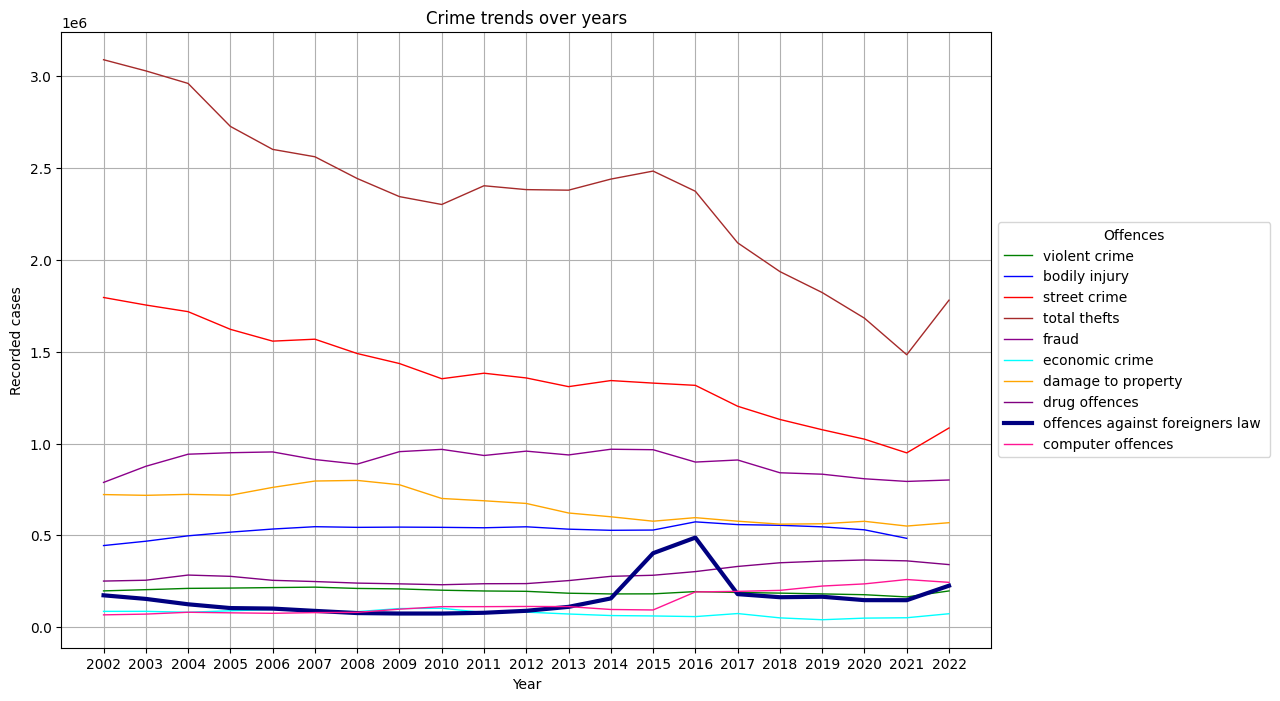

In [5]:
#Plotting trends in crimes over years (2002-2022)
data = pd.read_csv('table_crime_grouped_2002_2022.csv', delimiter=';')
years = [2002,2003,2004,2005,2006,2007,2008,2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

crime_columns = data.columns[1:]
colors = ['green', 'blue', 'red', 'brown', 'darkmagenta', 'cyan', 'orange', 'purple', 'navy', 'deeppink']

exclude_columns = ['dissemination of writings depicting pornography', 'offences against the Weapons Act', 'sexual abuse of children']

data = data.drop(columns=exclude_columns, errors='ignore')

data['computer offences'] = data['computer crime'] + data['computer fraud']

data.drop(['computer crime', 'computer fraud'], axis=1, inplace=True)

plt.figure(figsize=(12, 8))

for i, crime_column in enumerate(data.columns[1:]):
    label = crime_column
    line_width = 1.0

    if crime_column == 'offences against foreigners law ':
        line_width = 3.0  # Change line width for this specific line

    plt.plot(data['year'], data[crime_column], label=label, color=colors[i], linewidth=line_width)

plt.xticks(years)

plt.title('Crime trends over years')
plt.xlabel('Year')
plt.ylabel('Recorded cases')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Offences')
plt.grid(True)

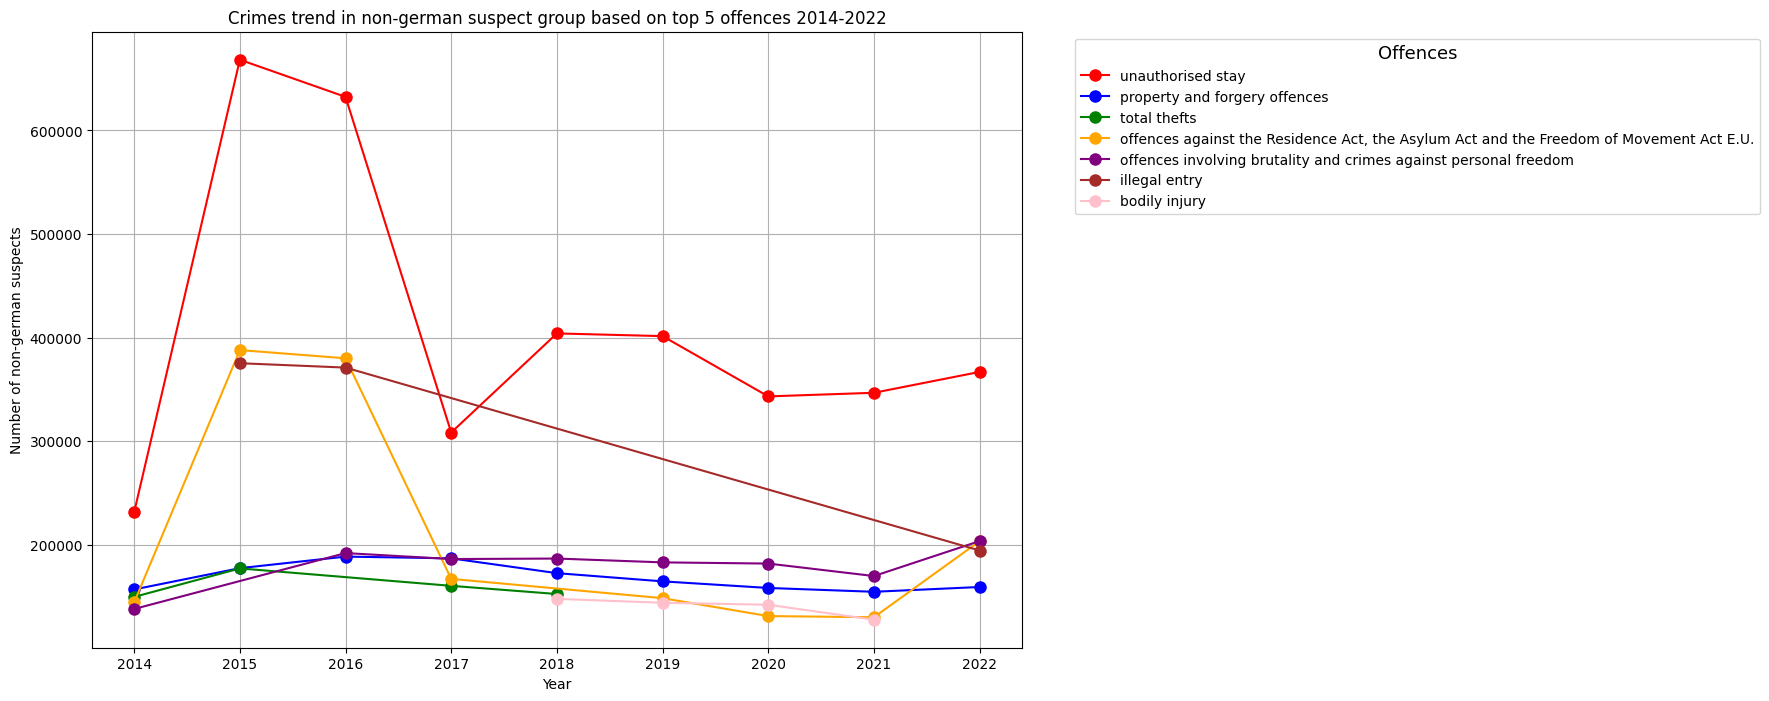

In [23]:
#Plotting non-German suspect crimes through years
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

top_5_by_year = []

offence_mapping = {
    'total offences, excluding offences against the Residence Act, the Asylum Act, and the Freedom of Movement Act/E.U. (key no. 725000)': 'total offences',
    'offences, excluding offences against the Residence Act, the Asylum Act, and the Freedom of Movement Act/E.U.': 'total offences',
    'offences, excluding offences against the Residence Act, the Asylum Act and the Freedom of Movement Act/E.U.': 'total offences',
    'total offences, excluding offences against the Residence Act, the Asylum Procedures Act and the Freedom of Movement Act/E.U. (key no. 725000)': 'total offences',
    'offences, excluding offences against the Residence Act, the Asylum Procedures Act and the Freedom of Movement Act/E.U.' : 'total offences',
    'total offences, excluding offences against the Residence Act, the Asylum Procedures Act, and the Freedom of Movement Act/E.U. (key no. 725000)': 'total offences',
    'offences, excluding offences against the Residence Act, the Asylum Procedures Act and the Freedom of Movement Act/E.U.':'total offences',
    'unauthorised stay (sect. 95 (1) nos. 1, 2 and (2) no. 1b Residence Act)': 'unauthorised stay',
    'unauthorised stay (sect. 95 (1) nos. 1, 2 and (2) Residence Act)': 'unauthorised stay',
    'unauthorised stay (sect. 95 (1) nos. 1, 2 Residence Act)': 'unauthorised stay',
    'unauthorised entry/unauthorised stay under the Aliens Act (key no 725100, 725700)':'unauthorised stay',
    'unauthorised stay after the Aliens Act (key no 725100, 725700)': 'unauthorised stay',
    'unauthorised stay after unauthorised/uncleared entry (border crossing)':'unauthorised stay',
    'offences against the Residence Act, the Asylum Act and the Freedom of Movement Act E.U.':'offences against the Residence Act, the Asylum Act and the Freedom of Movement Act E.U.',
    'offences against the Residence Act, the Asylum Procedures Act and the Freedom of Movement Act E.U.':'offences against the Residence Act, the Asylum Act and the Freedom of Movement Act E.U.',
    'illegal entry/illegal stay under the Aliens Act (key no 725100, 725700)': 'illegal entry',
    'unlawful entrants/residents (key nos. 725100, 725700)': 'illegal entry',
    'total number of thefts, namely:': 'total thefts',
    'bodily injury (sects. 223-227, 229, 231 PC)' : 'bodily injury'
}

for year, df in zip(years, cases_2014_2022):
    df['Offence'] = df['Offence'].replace(offence_mapping)
    filtered_df = df[
        ~df['Offence'].isin(['Supplementary criminal laws', 'total offences', 'offences against other supplementary criminal laws (excluding traffic offences)', 'offences against other supplementary criminal laws'])
    ]

    result_df = filtered_df[['Offence', 'Number of Non-German Suspects']]

    result_grouped = result_df.groupby('Offence')['Number of Non-German Suspects'].sum().reset_index()

    top_5_offences = result_grouped.sort_values(by='Number of Non-German Suspects', ascending=False).head(5)

    top_5_offences['Year'] = year
    top_5_by_year.append(top_5_offences)

final_result = pd.concat(top_5_by_year, ignore_index=True)

custom_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']

plt.figure(figsize=(12, 8))

for offence, color in zip(final_result['Offence'].unique(), custom_colors):
    plt.plot(final_result[final_result['Offence'] == offence]['Year'], final_result[final_result['Offence'] == offence]['Number of Non-German Suspects'], marker='o', markersize=8, label=offence, color=color)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Offences', title_fontsize='13')

plt.title('Crimes trend in non-german suspect group based on top 5 offences 2014-2022')
plt.xlabel('Year')
plt.ylabel('Number of non-german suspects')
plt.grid(True)

In [24]:
# Convert lists to DataFrames

cases_df = []
for case_data in cases:
  case_df = pd.DataFrame(case_data)
  cases_df.append(case_df)

suspects_df = []
for suspect_yearly_data in suspects:
  suspects_one_year_df = pd.DataFrame(suspect_yearly_data)
  suspects_df.append(suspects_one_year_df)

victims_df = []
for victims_yearly_data in victims:
  victims_one_year_df = pd.DataFrame(victims_yearly_data)
  victims_df.append(victims_yearly_data)

Within the crime dataset covering the years 2014 to 2022, crimes with keys above 890000 are composite categories encompassing multiple specific offenses. These aggregate crimes are singled out for detailed analysis, with the objective of extracting and examining the top ten of these overarching categories for each respective year:

In [25]:
# Create a list to store data after '890000' for each case file
data_after_key_890000 = []

# Iterate through each DataFrame in 'cases_df'
for case_df in cases_df[-9:]:
    # Find the index of the row with the key '890000'
    index_890000 = case_df[case_df['Key'] == '890000'].index

    # Check if '890000' exists in the DataFrame
    if not index_890000.empty:
        # Extract data after the row with the key '890000'
        data_after_key = case_df.iloc[index_890000[0]+1:]
        data_after_key_890000.append(data_after_key)
    else:
        # If '890000' doesn't exist, append an empty DataFrame to maintain alignment
        data_after_key_890000.append(pd.DataFrame())

In [26]:
# Filter cases DataFrames for the last 9 years (2014 to 2022)
last_9_years_cases = data_after_key_890000

# Create a list to store top 10 crimes for each year
top_10 = []

# Iterate through DataFrames of the last 9 years
for case_df in last_9_years_cases:
    # Sort the DataFrame by 'Percentage of All Cases' column in descending order
    sorted_cases = case_df[1:].sort_values(by='Percentage of All Cases', ascending=False)

    # Extract top 10 crimes based on percentage and append to 'top_10' list
    top_10_crimes = sorted_cases.head(10)['Offence'].tolist()
    top_10.append(top_10_crimes)

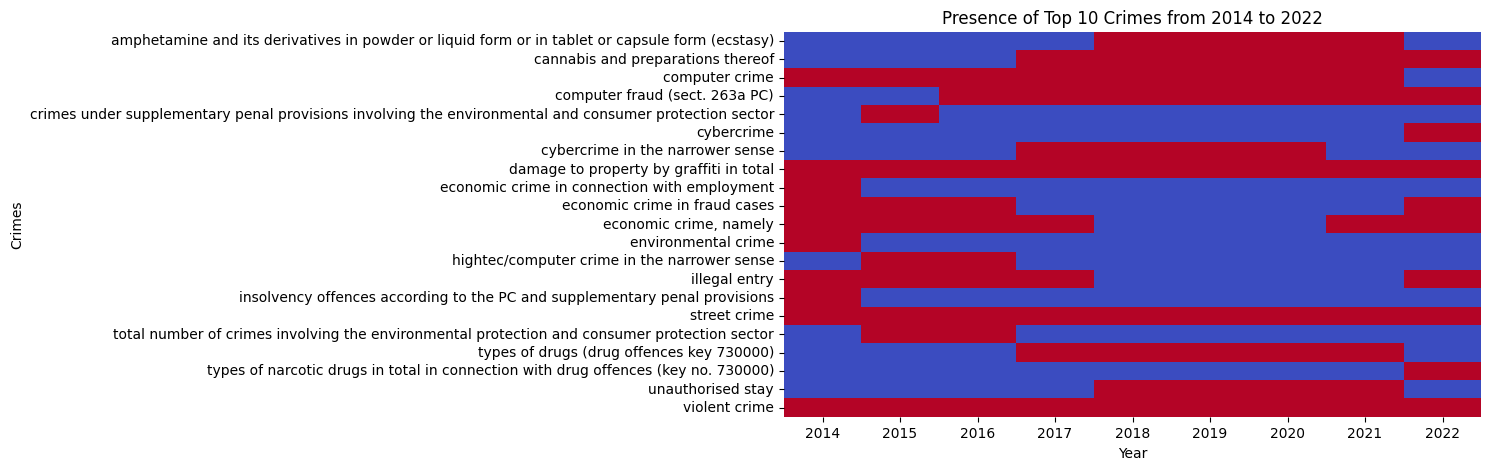

In [27]:
import seaborn as sns

# Create a DataFrame where columns represent crimes and rows represent years
# Fill the DataFrame with 1 if the crime is in the top 10 for that year, 0 otherwise
crimes_df = pd.DataFrame(0, columns=sorted(set(sum(top_10, []))), index=range(2014, 2023))
for year, crimes in zip(range(2014, 2023), top_10):
    crimes_df.loc[year, crimes] = 1


# Create the heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(crimes_df.T, cmap='coolwarm', cbar=False)
plt.title('Presence of Top 10 Crimes from 2014 to 2022')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.show()

Interpreting the Heatmap: Presence of Top 10 Crimes from 2014 to 2022

The heatmap visualizes the presence or absence of specific crimes within the top 10 list for each year from 2014 to 2022.

Red Color: Represents a value of 1 or higher, indicating the presence of the particular crime in the top 10 for the given year.
Blue Color: Represents 0, indicating the absence of a crime in the top 10 for a given year.

According to the heatmap computer crime, Damage in properties by graffiti in total, street crime and violent crime are present in the top 10 crimes over the years 2014 - 2022.

To facilitate a more detailed analysis of crime-related patterns across various age categories, we separate and categorize age-specific information from suspects and victims datasets for the years 2014 to 2022, creating distinct DataFrames for different age groups:

In [29]:
# Initialize lists to store extracted data
suspects_children_df = []
victims_children_df = []

suspects_juveniles_df = []
victims_juveniles_df = []

suspects_young_adults_df = []
victims_young_adults_df = []

suspects_adults_df = []
victims_adults_df = []

# Loop through each DataFrame in suspects_df and victims_df simultaneously
for suspect_yearly_df, victim_yearly_df in zip(suspects_df, victims_df):
    # Extract specific columns for children from suspects and append to suspects_children_df
    suspects_children = suspect_yearly_df.iloc[:, [0, 1, 4, 5, 6, 7, 8, 9]]
    suspects_children_df.append(suspects_children)
    victims_children = victim_yearly_df.iloc[:, [0, 1, 6, 9, 12]]
    victims_children_df.append(victims_children)

    # Extract columns for suspects juveniles
    suspects_juveniles_columns = suspect_yearly_df.iloc[:, [0, 1, 10, 11, 12]]
    suspects_juveniles_df.append(suspects_juveniles_columns)
    victims_juveniles_columns = victim_yearly_df.iloc[:, [0, 1, 15]]
    victims_juveniles_df.append(victims_juveniles_columns)

    # Extract columns for suspects young adults
    suspects_young_adults_columns= suspect_yearly_df.iloc[:, [0, 1, 14]]
    suspects_young_adults_df.append(suspects_young_adults_columns)
    victims_young_adults_columns= victim_yearly_df.iloc[:, [0, 1, 18]]
    victims_young_adults_df.append(victims_young_adults_columns)

    # Extract columns for suspects adults
    suspects_adults_columns = suspect_yearly_df.iloc[:, [0, 1] + list(range(15, 24))]
    suspects_adults_df.append(suspects_adults_columns)
    victims_adults_columns = victim_yearly_df.iloc[:, [0, 1, 21, 24, 27]]
    victims_adults_df.append(victims_adults_columns)

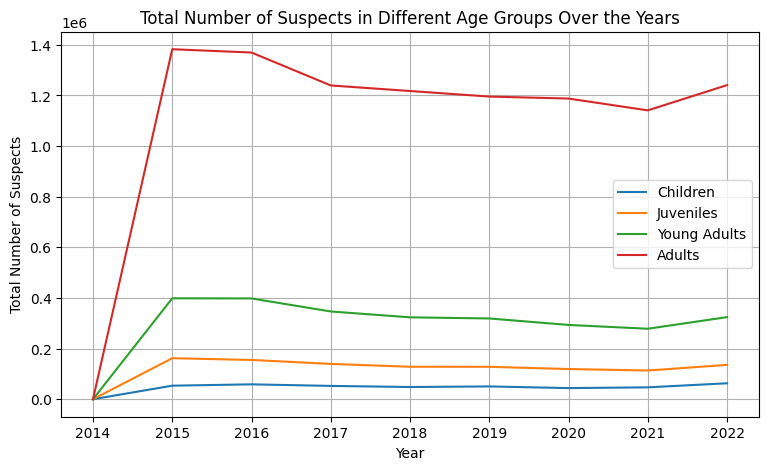

In [30]:
# Plotting the total number of suspects for different age groups over the years

# List of DataFrames for each age group
age_groups_data = [suspects_children_df, suspects_juveniles_df, suspects_young_adults_df, suspects_adults_df]
age_groups = ['Children', 'Juveniles', 'Young Adults', 'Adults']

# Extracting the totals for each age group over the years 2014 to 2022
totals = {age_group: [] for age_group in age_groups}

# Iterate through each age group's list of DataFrames
for idx, age_group_df_list in enumerate(age_groups_data):
    for year_df in age_group_df_list:
        # Extracting the total number of suspects for each year and age group
        year_total = year_df.iloc[0, -1]
        totals[age_groups[idx]].append(year_total)

plt.figure(figsize=(9, 5))

for age_group in age_groups:
    plt.plot(range(2014, 2023), totals[age_group], label=age_group)

plt.xlabel('Year')
plt.ylabel('Total Number of Suspects')
plt.title('Total Number of Suspects in Different Age Groups Over the Years')
plt.legend()
plt.grid(True)
plt.show()

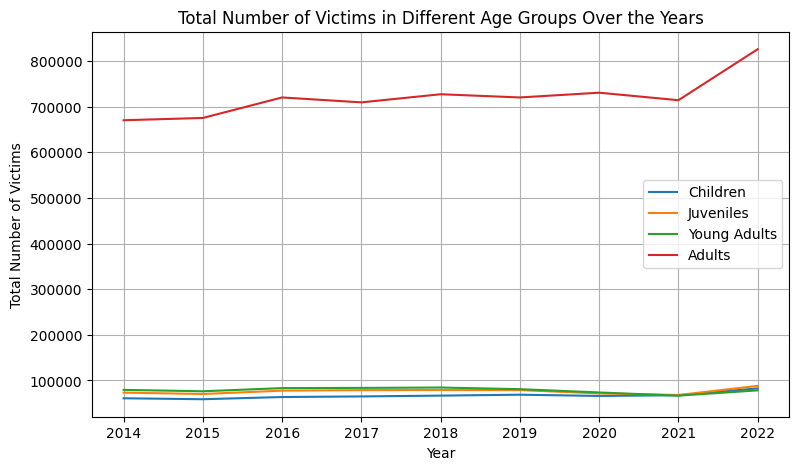

In [31]:
# Plotting the total number of victims for different age groups over the years

# List of DataFrames for each age group (victims)
age_groups_data_victims = [victims_children_df, victims_juveniles_df, victims_young_adults_df, victims_adults_df]
age_groups_victims = ['Children', 'Juveniles', 'Young Adults', 'Adults']

# Extracting the totals for each age group (victims) over the years 2014 to 2022
totals_victims = {age_group: [] for age_group in age_groups_victims}

# Iterate through each age group's list of DataFrames (victims)
for idx, age_group_df_list in enumerate(age_groups_data_victims):
    for year_df in age_group_df_list:
        # Extracting the total number of victims for each year and age group
        year_total_victims = year_df.iloc[0, -1]
        totals_victims[age_groups_victims[idx]].append(year_total_victims)

plt.figure(figsize=(9, 5))

for age_group_victims in age_groups_victims:
    plt.plot(range(2014, 2023), totals_victims[age_group_victims], label=age_group_victims)

plt.xlabel('Year')
plt.ylabel('Total Number of Victims')
plt.title('Total Number of Victims in Different Age Groups Over the Years')
plt.legend()
plt.grid(True)
plt.show()

Then we extract and visualize the total number of cases for different ranges of inhabitants (classified by population size) from 2014 to 2022. The resulting plot provides a comparative overview of case distribution across distinct inhabitant categories:

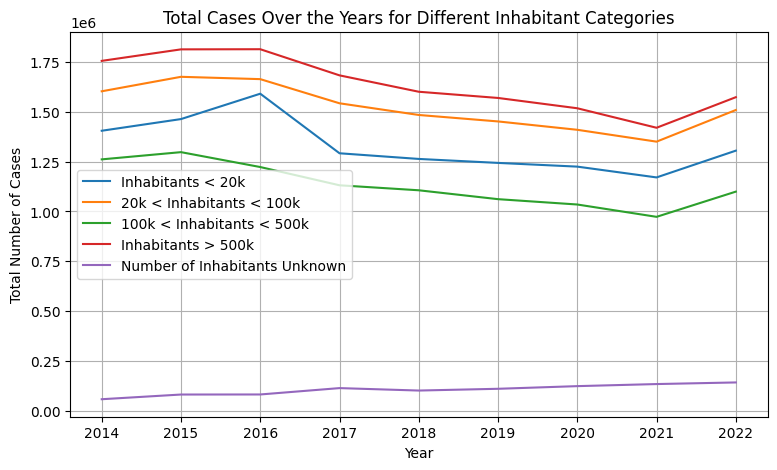

In [32]:
# Plotting the total cases for different ranges of inhabitants over the years

# Extracting the total number of cases for each category over the years 2014 to 2022
categories = ['Inhabitants < 20k', '20k < Inhabitants < 100k', '100k < Inhabitants < 500k', 'Inhabitants > 500k', 'Number of Inhabitants Unknown']
totals = []

for year_df in cases[-9:]:
    year_totals = [year_df[category][0] for category in categories]
    totals.append(year_totals)

plt.figure(figsize=(9, 5))

for i, category in enumerate(categories):
    plt.plot(range(2014, 2023), [year_total[i] for year_total in totals], label=category)

plt.xlabel('Year')
plt.ylabel('Total Number of Cases')
plt.title('Total Cases Over the Years for Different Inhabitant Categories')
plt.legend()
plt.grid(True)
plt.show()

Examining clearance rates alongside the total number of recorded cases from 2002 to 2022:

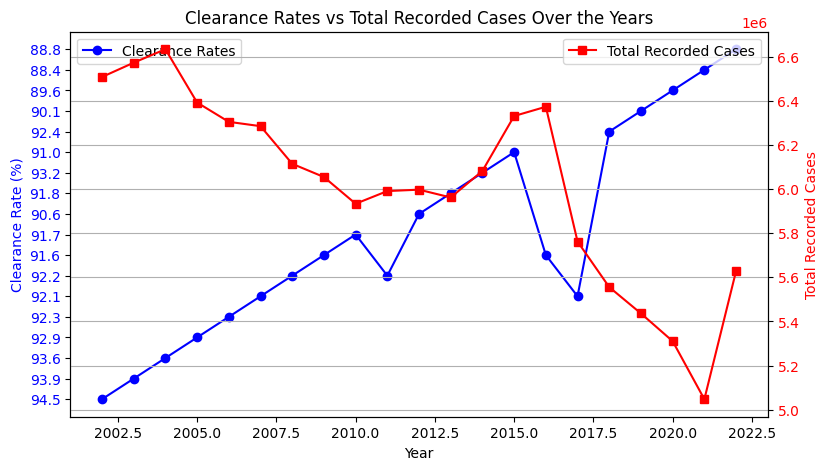

In [33]:
# Plotting clearance rates and total recorded cases on the same plot

# Extracting clearance rates and total recorded cases for the respective years
clearance_rates = []
total_recorded_cases = []  # Total recorded cases for each year

for year, year_df in enumerate(cases):
    # Extracting clearance rates and total recorded cases
    clearance_rate = year_df.loc[1, 'Clearance in %'] if year >= 12 else year_df.loc[1, 'CR% This Year']
    clearance_rates.append(clearance_rate)

    total_cases = year_df.loc[0, 'Recorded Cases']
    total_recorded_cases.append(total_cases)

fig, ax1 = plt.subplots(figsize=(9, 5))

# Plotting clearance rates on the left y-axis
ax1.plot(range(2002, 2023), clearance_rates, marker='o', color='b', label='Clearance Rates')
ax1.set_xlabel('Year')
ax1.set_ylabel('Clearance Rate (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Creating a second y-axis for total recorded cases on the right side
ax2 = ax1.twinx()
ax2.plot(range(2002, 2023), total_recorded_cases, marker='s', color='r', label='Total Recorded Cases')
ax2.set_ylabel('Total Recorded Cases', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

plt.title('Clearance Rates vs Total Recorded Cases Over the Years')
plt.grid(True)
plt.show()

Then, we plot the proportion of cleared cases on top of the total recorded cases, offering a visual comparison of clearance rate in relation to the overall volume of reported criminal incidents:







In [ ]:
# Plotting the portion of cases cleared on top of the total cases

# Initialize lists to store data
years = []
total_cases = []
percent_cleared = []

for year, year_df in enumerate(cases, start=2002):
    clearance_rate = float(year_df.loc[1, 'Clearance in %']) if year >= 2014 else float(year_df.loc[1, 'CR% This Year'])
    total = int(year_df.loc[0, 'Recorded Cases'])

    # Calculate the number of cases cleared based on the clearance rate percentage
    cleared = (clearance_rate / 100) * total
    percent_cleared.append(cleared)
    total_cases.append(total)
    years.append(year)

# Plotting the bar chart
plt.figure(figsize=(9, 5))

# Plotting the total recorded cases
plt.bar(years, total_cases, color='lightblue', label='Total Recorded Cases')

plt.bar(years, percent_cleared, color='orange', label='Cases Cleared', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Total Recorded Cases vs Cases Cleared Annually')
plt.legend()
plt.grid(axis='y')
plt.show()